In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import math
import matplotlib.ticker as ticker

In [3]:
data_out = pd.read_csv('/content/drive/MyDrive/TFG_Vanesa_Gómez_Martínez/BPtRoster.csv')

In [4]:
data_out.head()

,RecID,PtID,BCaseControlStatus
0,6,199,Case
1,8,194,Case
2,9,56,Control
3,10,201,Case
4,11,107,Control


In [5]:


data_out['BCaseControlStatus']=data_out['BCaseControlStatus'].replace(['Case'], 1).replace(['Control'], 0)


In [6]:
data1=pd.read_csv('/content/drive/MyDrive/TFG/Attitude_FS.csv', sep=',')
data2=pd.read_csv('/content/drive/MyDrive/TFG/BSampleResults2.csv', sep=',')
data3=pd.read_csv('/content/drive/MyDrive/TFG/MedChart_FS.csv', sep=',')
data4=pd.read_csv('/content/drive/MyDrive/TFG/Moca_FS.csv', sep=',')
data5=pd.read_csv('/content/drive/MyDrive/TFG/TotTestScores_FS.csv', sep=',')

In [7]:
data5.head()


,Unnamed: 0,PtID,SymbDigWTotCorr,SymbDigWNumErr,SymbDigOTotCorr,TrailMakATotTime,TrailMakBTotTime,GrPegDomHand,GrPegDomNumDrops,GrPegNonNumDrops,DukeSocIntScore,ReadCardLowLine_20/25,ReadCardLowLine_20/80
0,0,199,28.0,1.0,35.0,36,164.0,1.0,0.0,0.0,11.0,0,0
1,1,56,28.0,0.0,31.0,32,NaN,1.0,0.0,0.0,7.0,0,0
2,2,201,35.0,0.0,34.0,38,134.0,1.0,0.0,0.0,8.0,0,0
3,3,107,50.0,3.0,48.0,32,95.0,1.0,0.0,0.0,7.0,0,0
4,4,47,16.0,1.0,16.0,72,NaN,1.0,4.0,2.0,7.0,0,0


In [8]:
data1.drop(['Unnamed: 0'], axis=1, inplace=True)
data2.drop(['Unnamed: 0'], axis=1, inplace=True)
data3.drop(['Unnamed: 0'], axis=1, inplace=True)
data4.drop(['Unnamed: 0'], axis=1, inplace=True)
data5.drop(['Unnamed: 0'], axis=1, inplace=True)


In [ ]:
#UNIÓN DE LAS 5 BASES
data = data_out.merge(data1, on='PtID')
data = data.merge(data2, on='PtID')
data = data.merge(data3, on='PtID')
data = data.merge(data4, on='PtID')
# data = data.merge(data5, on='PtID')


In [ ]:
#UNIÓN DE BSAMPLERESULTS Y MEDCHART
data = data_out.merge(data2, on='PtID')
data = data.merge(data3, on='PtID')


In [ ]:
#UNIÓN DE TotTestScores Y MoCA y Attitude
data = data_out.merge(data4, on='PtID')
data = data.merge(data5, on='PtID')
data = data.merge(data1, on='PtID')


In [ ]:
#UNIÓN DE BSAMPLERESULTS, BMEDCHART, Y TOTTESTSCORES
data = data_out.merge(data2, on='PtID')
data = data.merge(data3, on='PtID')
data = data.merge(data5, on='PtID')
# data = data.merge(data4, on='PtID')

In [ ]:
#UNIÓN DE BSAMPLERESULTS, BMEDCHART, Y attitude
data = data_out.merge(data2, on='PtID')
data = data.merge(data3, on='PtID')
data = data.merge(data1, on='PtID')
# data = data.merge(data4, on='PtID')

In [ ]:
#UNIÓN DE BSAMPLERESULTS, BMEDCHART, Y attitude, tottestscores
data = data_out.merge(data2, on='PtID')
data = data.merge(data3, on='PtID')
data = data.merge(data1, on='PtID')
data = data.merge(data5, on='PtID')

In [ ]:
data

,RecID,PtID,BCaseControlStatus,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,Weight_mod,...,SymbDigWNumErr,SymbDigOTotCorr,TrailMakATotTime,TrailMakBTotTime,GrPegDomHand,GrPegDomNumDrops,GrPegNonNumDrops,DukeSocIntScore,ReadCardLowLine_20/25,ReadCardLowLine_20/80
0,6,199,1,7.4,0.017,1.24,132.0,NaN,36.0,80.73,...,1.0,35.0,36,164.0,1.0,0.0,0.0,11.0,0,0
1,9,56,0,8.6,1.079,0.99,292.0,NaN,NaN,82.45,...,0.0,31.0,32,NaN,1.0,0.0,0.0,7.0,0,0
2,10,201,1,6.4,0.017,1.32,148.0,NaN,NaN,98.87,...,0.0,34.0,38,134.0,1.0,0.0,0.0,8.0,0,0
3,11,107,0,7.2,0.017,0.89,262.0,NaN,NaN,99.14,...,3.0,48.0,32,95.0,1.0,0.0,0.0,7.0,0,0
4,26,47,1,6.4,0.017,0.66,133.0,NaN,NaN,95.78,...,1.0,16.0,72,NaN,1.0,4.0,2.0,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,117,70,1,7.5,0.017,1.48,53.0,5.0,30.0,113.83,...,0.0,16.0,78,269.0,1.0,0.0,0.0,8.0,0,0
219,119,147,0,7.5,0.017,0.61,405.0,4.0,45.0,56.69,...,0.0,39.0,45,101.0,1.0,0.0,0.0,8.0,0,0
220,154,160,0,7.0,0.043,0.80,206.0,NaN,45.0,70.30,...,0.0,35.0,65,225.0,1.0,0.0,0.0,9.0,0,0
221,157,111,0,8.8,0.017,1.02,381.0,NaN,80.0,85.70,...,0.0,61.0,34,61.0,1.0,0.0,0.0,8.0,0,0


In [ ]:
data.drop(['RecID'], axis=1, inplace=True)
data.drop(['PtID'], axis=1, inplace=True)


In [ ]:
data

,BCaseControlStatus,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,Weight_mod,Height_mod,HighBGLevTakeAction,...,SymbDigWNumErr,SymbDigOTotCorr,TrailMakATotTime,TrailMakBTotTime,GrPegDomHand,GrPegDomNumDrops,GrPegNonNumDrops,DukeSocIntScore,ReadCardLowLine_20/25,ReadCardLowLine_20/80
0,1,7.4,0.017,1.24,132.0,NaN,36.0,80.73,163.00,200.0,...,1.0,35.0,36,164.0,1.0,0.0,0.0,11.0,0,0
1,0,8.6,1.079,0.99,292.0,NaN,NaN,82.45,180.34,230.0,...,0.0,31.0,32,NaN,1.0,0.0,0.0,7.0,0,0
2,1,6.4,0.017,1.32,148.0,NaN,NaN,98.87,188.98,250.0,...,0.0,34.0,38,134.0,1.0,0.0,0.0,8.0,0,0
3,0,7.2,0.017,0.89,262.0,NaN,NaN,99.14,184.00,150.0,...,3.0,48.0,32,95.0,1.0,0.0,0.0,7.0,0,0
4,1,6.4,0.017,0.66,133.0,NaN,NaN,95.78,188.98,150.0,...,1.0,16.0,72,NaN,1.0,4.0,2.0,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,7.5,0.017,1.48,53.0,5.0,30.0,113.83,185.42,250.0,...,0.0,16.0,78,269.0,1.0,0.0,0.0,8.0,0,0
219,0,7.5,0.017,0.61,405.0,4.0,45.0,56.69,165.10,400.0,...,0.0,39.0,45,101.0,1.0,0.0,0.0,8.0,0,0
220,0,7.0,0.043,0.80,206.0,NaN,45.0,70.30,167.60,200.0,...,0.0,35.0,65,225.0,1.0,0.0,0.0,9.0,0,0
221,0,8.8,0.017,1.02,381.0,NaN,80.0,85.70,182.80,150.0,...,0.0,61.0,34,61.0,1.0,0.0,0.0,8.0,0,0


In [ ]:
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((223, 23), (223,))

In [ ]:
X

,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,Weight_mod,Height_mod,HighBGLevTakeAction,LowBGLevTakeAction,...,SymbDigWNumErr,SymbDigOTotCorr,TrailMakATotTime,TrailMakBTotTime,GrPegDomHand,GrPegDomNumDrops,GrPegNonNumDrops,DukeSocIntScore,ReadCardLowLine_20/25,ReadCardLowLine_20/80
0,7.4,0.017,1.24,132.0,NaN,36.0,80.73,163.00,200.0,70.0,...,1.0,35.0,36,164.0,1.0,0.0,0.0,11.0,0,0
1,8.6,1.079,0.99,292.0,NaN,NaN,82.45,180.34,230.0,70.0,...,0.0,31.0,32,NaN,1.0,0.0,0.0,7.0,0,0
2,6.4,0.017,1.32,148.0,NaN,NaN,98.87,188.98,250.0,50.0,...,0.0,34.0,38,134.0,1.0,0.0,0.0,8.0,0,0
3,7.2,0.017,0.89,262.0,NaN,NaN,99.14,184.00,150.0,60.0,...,3.0,48.0,32,95.0,1.0,0.0,0.0,7.0,0,0
4,6.4,0.017,0.66,133.0,NaN,NaN,95.78,188.98,150.0,60.0,...,1.0,16.0,72,NaN,1.0,4.0,2.0,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,7.5,0.017,1.48,53.0,5.0,30.0,113.83,185.42,250.0,70.0,...,0.0,16.0,78,269.0,1.0,0.0,0.0,8.0,0,0
219,7.5,0.017,0.61,405.0,4.0,45.0,56.69,165.10,400.0,65.0,...,0.0,39.0,45,101.0,1.0,0.0,0.0,8.0,0,0
220,7.0,0.043,0.80,206.0,NaN,45.0,70.30,167.60,200.0,65.0,...,0.0,35.0,65,225.0,1.0,0.0,0.0,9.0,0,0
221,8.8,0.017,1.02,381.0,NaN,80.0,85.70,182.80,150.0,75.0,...,0.0,61.0,34,61.0,1.0,0.0,0.0,8.0,0,0


In [ ]:
from sklearn.svm import SVC

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

def regresion_logistica(X_train, X_test, Y_train, Y_test,semilla):
  logreg= LogisticRegression(solver='liblinear',random_state=semilla)
  parameters = {"C":[1e-8,1e-7,1e-6,1e-5,1e-4,1,10,20, 30,40,50,100],"penalty":["l1"]}# l1 lasso l2 ridge
  valor_C=np.array([1e-8,1e-4,1,10,20,30,40,50,100])
  log_regression=GridSearchCV(logreg, parameters, scoring='accuracy', cv=5, return_train_score=True)

  log_regression.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
  roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

    # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))

# 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  log_regression.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  regre_clasif = log_regression.best_estimator_
  modelo_regresion = regre_clasif.fit(X_train, Y_train)

  y_output_regresion = modelo_regresion.predict(X_test)
  print(accuracy_score(Y_test, y_output_regresion))
  print(confusion_matrix(Y_test, y_output_regresion))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_regresion).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_regresion)
  Accuracy = accuracy_score(Y_test, y_output_regresion)
  Precision=precision_score(Y_test, y_output_regresion)
  f1=f1_score(Y_test, y_output_regresion)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_regresion)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)




In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_train, X_test, Y_train, Y_test,semilla):

  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,24), 'min_samples_leaf': range(5,50)}
  profundidad_grid = np.array(range(1,24))

  # X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)
  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=semilla), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
  grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  # perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  # perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  # plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  # plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  # plt.xlabel('Profundidad',fontsize=14)
  # plt.ylabel('ROC-AUC',fontsize=14)
  # plt.legend()
  # plt.show()

  print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

  # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  grid_arbol_clasif.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  Arbol_clasif_all = grid_arbol_clasif.best_estimator_
  modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)

  y_output_arbol = modelo_arbol_clasif.predict(X_test)
  print(accuracy_score(Y_test, y_output_arbol))
  print(confusion_matrix(Y_test, y_output_arbol))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_arbol)
  Accuracy = accuracy_score(Y_test, y_output_arbol)
  Precision=precision_score(Y_test, y_output_arbol)
  f1=f1_score(Y_test, y_output_arbol)
  print("Sensibilidad, Accuracy, Especifididad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [ ]:
def knn (X_train,X_test,Y_train,Y_test):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
  grid_knn.fit(X_train, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel('roc_auc',fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

  # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  grid_knn.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  kNN_clasif_all = grid_knn.best_estimator_
  modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)

  y_output_knn2 = modelo_knn_clasif2.predict(X_test)
  print(accuracy_score(Y_test, y_output_knn2))
  print(confusion_matrix(Y_test, y_output_knn2))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
  Especificidad = tn / (tn + fp)

  Recall= recall_score(Y_test, y_output_knn2)
  Accuracy = accuracy_score(Y_test, y_output_knn2)
  Precision=precision_score(Y_test, y_output_knn2)
  f1=f1_score(Y_test, y_output_knn2)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],
           'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [9]:
def svc (X_train,X_test,Y_train,Y_test,semilla):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
  svc=SVC(decision_function_shape='ovo',random_state=semilla)
  parameters = {'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

  svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

  svc.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
  roc_svc_val = np.array(svc.cv_results_['mean_test_score'])

  # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))

  # 2. Consulta de los valores de los hiper-parámetros 
  svc.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  svc_classif = svc.best_estimator_
  modelo_svc = svc_classif.fit(X_train, Y_train)

  y_output_svc = modelo_svc.predict(X_test)
  print(accuracy_score(Y_test, y_output_svc))
  print(confusion_matrix(Y_test, y_output_svc))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_svc)
  Accuracy = accuracy_score(Y_test, y_output_svc)
  Precision=precision_score(Y_test, y_output_svc)
  f1=f1_score(Y_test, y_output_svc)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [ ]:
def svc_lineal (X_train,X_test,Y_train,Y_test,semilla):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
  svc=SVC(decision_function_shape='ovo',random_state=semilla)
  parameters = {'kernel': ['linear'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

  svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

  svc.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
  roc_svc_val = np.array(svc.cv_results_['mean_test_score'])

  # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))

  # 2. Consulta de los valores de los hiper-parámetros 
  svc.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  svc_classif = svc.best_estimator_
  modelo_svc = svc_classif.fit(X_train, Y_train)

  y_output_svc = modelo_svc.predict(X_test)
  print(accuracy_score(Y_test, y_output_svc))
  print(confusion_matrix(Y_test, y_output_svc))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_svc)
  Accuracy = accuracy_score(Y_test, y_output_svc)
  Precision=precision_score(Y_test, y_output_svc)
  f1=f1_score(Y_test, y_output_svc)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [ ]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []

#LISTAS PARA STANDARD SCALER
# recall_reg_std = []
# accuracy_reg_std = []
# precision_reg_std=[]
# f1_reg_std=[]
# roc_reg_std= []

# recall_arbol_std = []
# accuracy_arbol_std = []
# precision_arbol_std=[]
# f1_arbol_std=[]
# roc_arbol_std= []

# recall_knn_std = []
# accuracy_knn_std = []
# precision_knn_std=[]
# f1_knn_std=[]
# roc_knn_std= []

# recall_svc_std = []
# accuracy_svc_std = []
# precision_svc_std=[]
# f1_svc_std=[]
# roc_svc_std= []

# recall_svc_lin_std = []
# accuracy_svc_lin_std = []
# precision_svc_lin_std=[]
# f1_svc_lin_std=[]
# roc_svc_lin_std= []

#LISTAS PARA MIN-MAX

recall_reg_scaler = []
accuracy_reg_scaler = []
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler= []

recall_arbol_scaler = []
accuracy_arbol_scaler = []
precision_arbol_scaler=[]
f1_arbol_scaler=[]
roc_arbol_scaler= []

recall_knn_scaler = []
accuracy_knn_scaler = []
precision_knn_scaler=[]
f1_knn_scaler=[]
roc_knn_scaler= []

recall_svc_scaler = []
accuracy_svc_scaler = []
precision_svc_scaler=[]
f1_svc_scaler=[]
roc_svc_scaler= []

recall_svc_lin_scaler = []
accuracy_svc_lin_scaler = []
precision_svc_lin_scaler=[]
f1_svc_lin_scaler=[]
roc_svc_lin_scaler= []

recall_mlp_lin_scaler = []
accuracy_mlp_lin_scaler = []
precision_mlp_lin_scaler=[]
f1_mlp_lin_scaler=[]
roc_mlp_lin_scaler= []

for i in range(0, 5):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y, test_size=0.2, random_state=i)
  print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

  list_x_train.append(X_train)
  list_y_train.append(Y_train)
  list_y_test.append(Y_test)
  list_x_test.append(X_test)

  


(178, 23) (178,) (45, 23) (45,)
(178, 23) (178,) (45, 23) (45,)
(178, 23) (178,) (45, 23) (45,)
(178, 23) (178,) (45, 23) (45,)
(178, 23) (178,) (45, 23) (45,)


# ***UNIÓN DE 4 SIN TOTTESTSCORES***

# ***PRIMERA PARTICIÓN***

In [ ]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [ ]:
X_train_0

,HighBGLevTakeAction,LowBGLevTakeAction,PtCurrA1cGoal,DealHypoEp_Neutral,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,Weight_mod,Height_mod,MoCAVisEx,MoCAAtt2,MoCALang2,MoCADelRec
143,125.0,70.0,70.0,1,7.5,0.017,0.51,93.0,6.0,45.0,53.06,154.94,5.0,1.0,1.0,4.0
24,150.0,70.0,70.0,0,9.0,0.017,0.85,208.0,NaN,30.0,59.59,163.83,5.0,1.0,1.0,4.0
168,275.0,45.0,61.0,0,6.3,0.017,0.64,113.0,NaN,NaN,88.89,165.10,4.0,1.0,1.0,3.0
189,250.0,90.0,69.0,1,7.8,0.109,0.73,346.0,NaN,NaN,51.43,154.94,5.0,1.0,1.0,3.0
69,125.0,68.0,54.0,0,6.7,0.017,0.68,126.0,NaN,22.0,58.90,161.70,4.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,300.0,60.0,60.0,0,10.2,0.017,1.05,59.0,NaN,0.0,88.30,175.00,4.0,1.0,0.0,2.0
83,300.0,70.0,80.0,0,7.7,0.023,0.72,92.0,NaN,NaN,82.09,175.00,5.0,1.0,1.0,3.0
207,175.0,80.0,68.0,1,6.2,0.017,0.62,295.0,6.0,22.0,71.56,167.64,5.0,1.0,1.0,5.0
117,150.0,70.0,58.0,1,6.8,0.017,0.91,194.0,6.0,70.0,76.87,177.80,5.0,1.0,1.0,1.0


Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_0, Y_train_0, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=18, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_0)

# transform the dataset
X_train_0 = imputer.transform(X_train_0)

# print total missing
print('Missing: %d' % sum(isnan(X_train_0).flatten()))

X_test_0=imputer.transform(X_test_0)
print('Missing: %d' % sum(isnan(X_test_0).flatten()))


Missing: 0
Missing: 0


In [ ]:
X

,HighBGLevTakeAction,LowBGLevTakeAction,PtCurrA1cGoal,DealHypoEp_Neutral,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,Weight_mod,Height_mod,MoCAVisEx,MoCAAtt2,MoCALang2,MoCADelRec
0,200.0,70.0,65.0,0,7.4,0.017,1.24,132.0,NaN,36.0,80.73,163.00,5.0,1.0,0.0,2.0
1,230.0,70.0,120.0,1,8.6,1.079,0.99,292.0,NaN,NaN,82.45,180.34,4.0,1.0,1.0,1.0
2,250.0,50.0,60.0,0,6.4,0.017,1.32,148.0,NaN,NaN,98.87,188.98,5.0,1.0,1.0,3.0
3,150.0,60.0,58.0,0,7.2,0.017,0.89,262.0,NaN,NaN,99.14,184.00,4.0,1.0,0.0,2.0
4,150.0,60.0,NaN,0,6.4,0.017,0.66,133.0,NaN,NaN,95.78,188.98,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,250.0,70.0,70.0,0,7.5,0.017,1.48,53.0,5.0,30.0,113.83,185.42,2.0,0.0,0.0,3.0
219,400.0,65.0,78.0,1,7.5,0.017,0.61,405.0,4.0,45.0,56.69,165.10,3.0,1.0,1.0,4.0
220,200.0,65.0,70.0,0,7.0,0.043,0.80,206.0,NaN,45.0,70.30,167.60,4.0,1.0,1.0,2.0
221,150.0,75.0,78.0,0,8.8,0.017,1.02,381.0,NaN,80.0,85.70,182.80,5.0,1.0,1.0,3.0


In [ ]:
X_train_numerical0=X_train_0[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_train_categorical0=X_train_0[:,[3,13,14]]
X_test_numerical0=X_test_0[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_test_categorical0=X_test_0[:,[3,13,14]]



In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [ ]:
X_train_scaler_all0.shape

(178, 16)

A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 40, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.595
0.6444444444444445
[[18  7]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.6444444444444445 0.72 0.5789473684210527


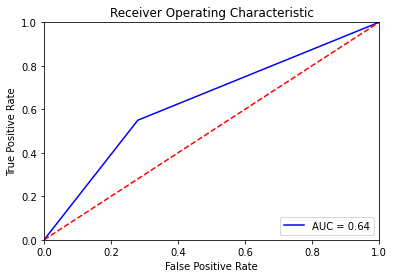

{'max_depth': 7, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.663
Mejor valor del hiperparámetro: {'max_depth': 7, 'min_samples_leaf': 5}
0.6
[[20  5]
 [13  7]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.35 0.6 0.8 0.4375


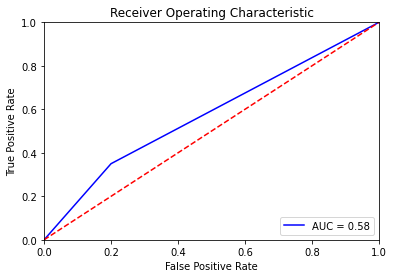

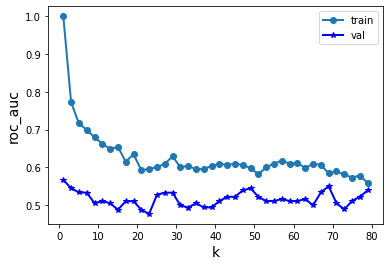

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.567
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}
0.6444444444444445
[[22  3]
 [13  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.35 0.6444444444444445 0.88 0.4666666666666667


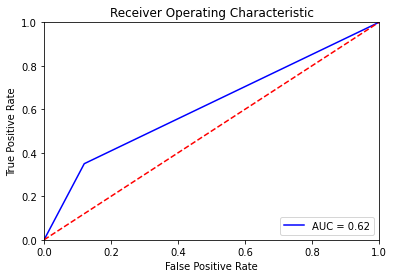

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.567
0.6
[[17  8]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.6 0.68 0.5263157894736842


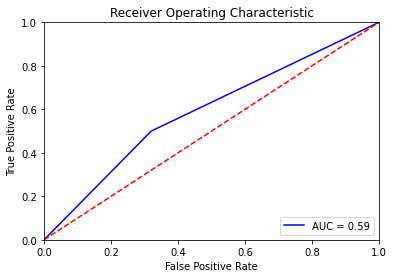

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.567
0.5777777777777777
[[25  0]
 [19  1]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.05 0.5777777777777777 1.0 0.09523809523809523


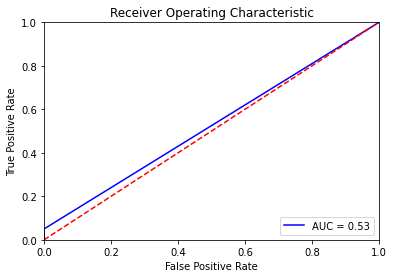

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Segunda partición***

In [ ]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]

In [ ]:
X_train_1.isna().sum()

HighBGLevTakeAction       2
LowBGLevTakeAction        2
PtCurrA1cGoal             3
DealHypoEp_Neutral        0
Value_HBA1C               0
Value_CPEP                5
Value_CREAS               4
Value_GLU                 5
NumMeterCheckDayMeter    80
LastFoodIntakeCarbs      41
Weight_mod                1
Height_mod                3
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_1, Y_train_1, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_1)

# transform the dataset
X_train_1 = imputer.transform(X_train_1)

# print total missing
print('Missing: %d' % sum(isnan(X_train_1).flatten()))

X_test_1=imputer.transform(X_test_1)
print('Missing: %d' % sum(isnan(X_test_1).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical1=X_train_1[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_train_categorical1=X_train_1[:,[3,13,14]]
X_test_numerical1=X_test_1[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_test_categorical1=X_test_1[:,[3,13,14]]



In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


Valor correspondiente para el hiperparámetro: {'C': 20, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.641
0.6444444444444445
[[17  8]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.6444444444444445 0.68 0.6


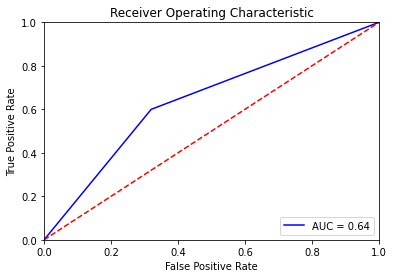

{'max_depth': 1, 'min_samples_leaf': 45}
Mejor ROC-AUC en validación cruzada: 0.635
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 45}
0.5555555555555556
[[14 11]
 [ 9 11]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.55 0.5555555555555556 0.56 0.5238095238095238


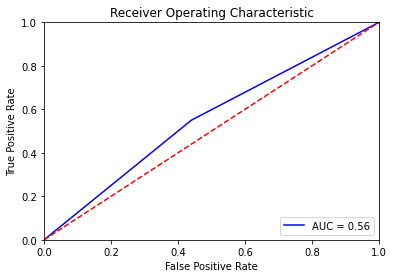

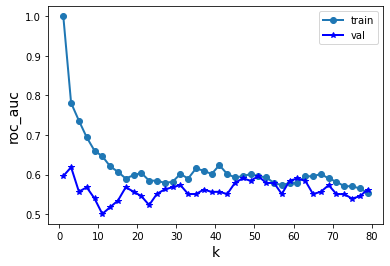

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.618
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.5777777777777777
[[17  8]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.5777777777777777 0.68 0.48648648648648646


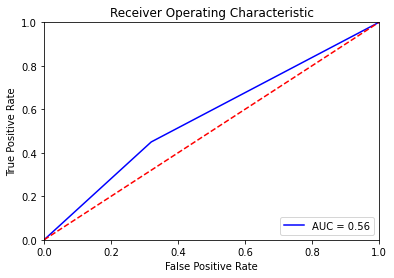

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.585
0.5777777777777777
[[15 10]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.5777777777777777 0.6 0.5365853658536585


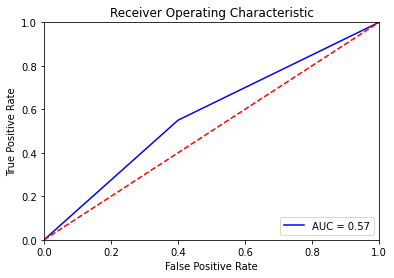

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
0.6222222222222222
[[17  8]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.6222222222222222 0.68 0.5641025641025641


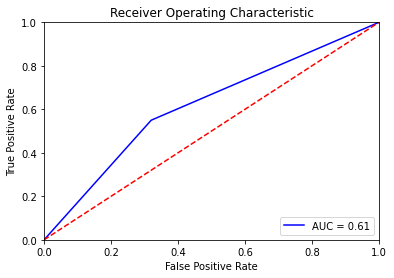

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Tercera partición***

In [ ]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [ ]:
X_train_2.isna().sum()

HighBGLevTakeAction       1
LowBGLevTakeAction        1
PtCurrA1cGoal             5
DealHypoEp_Neutral        0
Value_HBA1C               0
Value_CPEP                4
Value_CREAS               5
Value_GLU                 4
NumMeterCheckDayMeter    78
LastFoodIntakeCarbs      37
Weight_mod                1
Height_mod                3
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

>1 0.654 (0.101)
>3 0.635 (0.097)
>5 0.636 (0.128)
>7 0.652 (0.119)
>9 0.650 (0.124)
>15 0.626 (0.119)
>18 0.639 (0.105)
>21 0.650 (0.131)


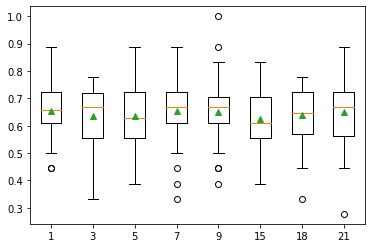

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_2)

# transform the dataset
X_train_2 = imputer.transform(X_train_2)

# print total missing
print('Missing: %d' % sum(isnan(X_train_2).flatten()))

X_test_2=imputer.transform(X_test_2)
print('Missing: %d' % sum(isnan(X_test_2).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical2=X_train_2[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_train_categorical2=X_train_2[:,[3,13,14]]
X_test_numerical2=X_test_2[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_test_categorical2=X_test_2[:,[3,13,14]]



In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 30, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.589
0.5333333333333333
[[15 10]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.5333333333333333 0.6 0.46153846153846156


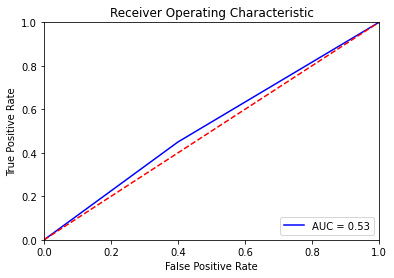

{'max_depth': 4, 'min_samples_leaf': 18}
Mejor ROC-AUC en validación cruzada: 0.606
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 18}
0.6
[[16  9]
 [ 9 11]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.55 0.6 0.64 0.55


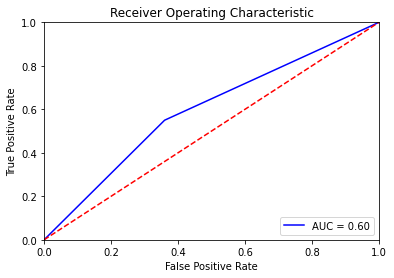

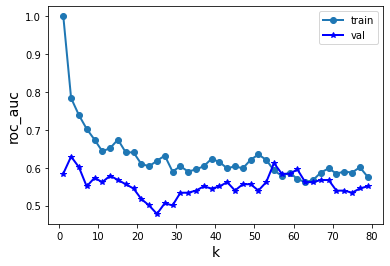

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.629
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.5333333333333333
[[20  5]
 [16  4]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2 0.5333333333333333 0.8 0.2758620689655173


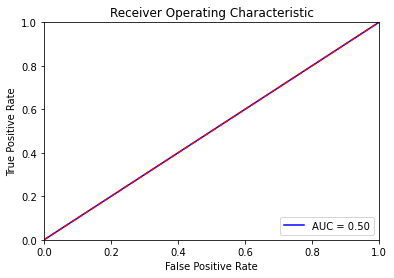

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.584
0.4222222222222222
[[14 11]
 [15  5]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.25 0.4222222222222222 0.56 0.2777777777777778


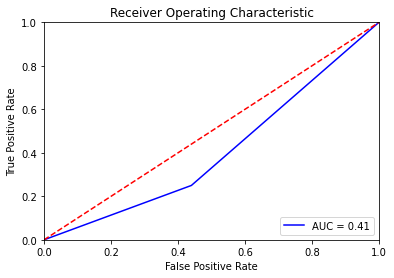

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.595
0.5333333333333333
[[15 10]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.5333333333333333 0.6 0.46153846153846156


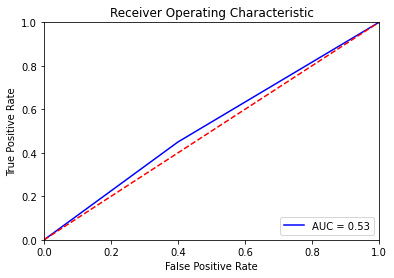

In [ ]:
# #VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

mlp=MLP(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_mlp_lin_scaler.append(sl[0])
accuracy_mlp_lin_scaler.append(sl[1])
precision_mlp_lin_scaler.append(sl[2])
f1_mlp_lin_scaler.append(sl[3])
roc_mlp_lin_scaler.append(s[4])

# ***Cuarta partición***

In [ ]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [ ]:
X_train_3.isna().sum()

HighBGLevTakeAction       2
LowBGLevTakeAction        2
PtCurrA1cGoal             4
DealHypoEp_Neutral        0
Value_HBA1C               0
Value_CPEP                3
Value_CREAS               3
Value_GLU                 2
NumMeterCheckDayMeter    83
LastFoodIntakeCarbs      38
Weight_mod                1
Height_mod                3
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_3, Y_train_3, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7 ,weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_3)

# transform the dataset
X_train_3 = imputer.transform(X_train_3)

# print total missing
print('Missing: %d' % sum(isnan(X_train_3).flatten()))

X_test_3=imputer.transform(X_test_3)
print('Missing: %d' % sum(isnan(X_test_3).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical3=X_train_3[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_train_categorical3=X_train_3[:,[3,13,14]]
X_test_numerical3=X_test_3[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_test_categorical3=X_test_3[:,[3,13,14]]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.585
0.7555555555555555
[[21  4]
 [ 7 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.65 0.7555555555555555 0.84 0.7027027027027027


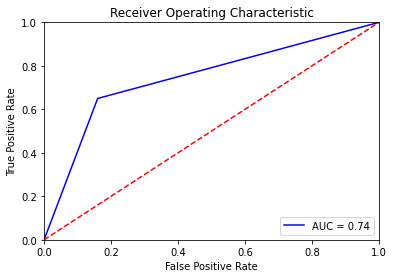

{'max_depth': 2, 'min_samples_leaf': 27}
Mejor ROC-AUC en validación cruzada: 0.585
Mejor valor del hiperparámetro: {'max_depth': 2, 'min_samples_leaf': 27}
0.4666666666666667
[[15 10]
 [14  6]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.3 0.4666666666666667 0.6 0.33333333333333326


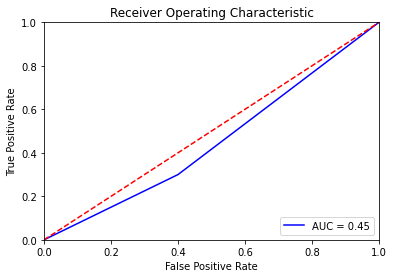

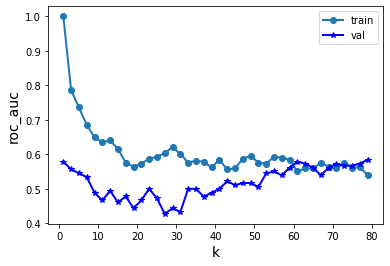

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.584
Valor correspondiente para el hiperparámetro: {'n_neighbors': 79}
0.6
[[23  2]
 [16  4]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2 0.6 0.92 0.30769230769230765


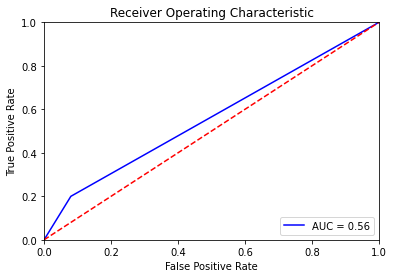

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.5555555555555556
[[25  0]
 [20  0]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.0 0.5555555555555556 1.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


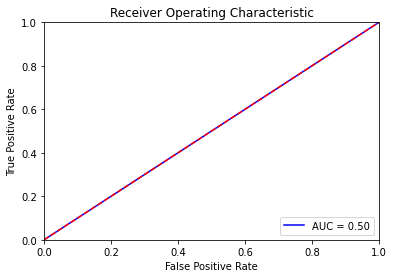

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.563
0.6444444444444445
[[17  8]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.6444444444444445 0.68 0.6


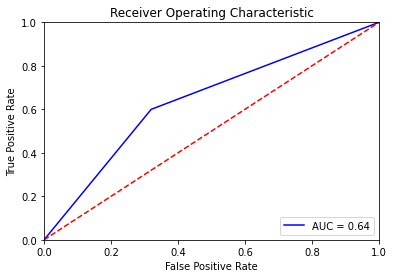

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Quinta partición***

In [ ]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

In [ ]:
X_train_4.isna().sum()

HighBGLevTakeAction       1
LowBGLevTakeAction        1
PtCurrA1cGoal             5
DealHypoEp_Neutral        0
Value_HBA1C               0
Value_CPEP                5
Value_CREAS               5
Value_GLU                 5
NumMeterCheckDayMeter    84
LastFoodIntakeCarbs      37
Weight_mod                1
Height_mod                3
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_4, Y_train_4, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=18, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_4)

# transform the dataset
X_train_4 = imputer.transform(X_train_4)

# print total missing
print('Missing: %d' % sum(isnan(X_train_4).flatten()))

X_test_4=imputer.transform(X_test_4)
print('Missing: %d' % sum(isnan(X_test_4).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical4=X_train_4[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_train_categorical4=X_train_4[:,[3,13,14]]
X_test_numerical4=X_test_4[:,[0,1,2,4,5,6,7,8,9,10,11,12,15]]
X_test_categorical4=X_test_4[:,[3,13,14]]



In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 20, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.601
0.6222222222222222
[[18  7]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.6222222222222222 0.72 0.5405405405405405


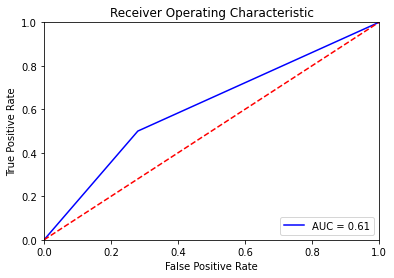

{'max_depth': 5, 'min_samples_leaf': 12}
Mejor ROC-AUC en validación cruzada: 0.635
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 12}
0.4888888888888889
[[12 13]
 [10 10]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.5 0.4888888888888889 0.48 0.46511627906976744


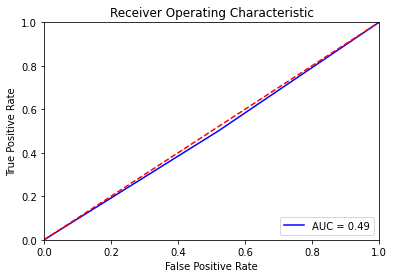

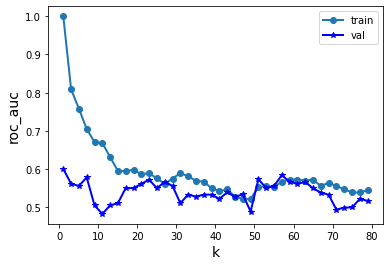

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.601
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}
0.4666666666666667
[[14 11]
 [13  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.35 0.4666666666666667 0.56 0.36842105263157887


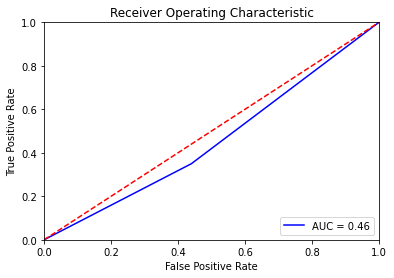

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.618
0.5111111111111111
[[15 10]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.5111111111111111 0.6 0.4210526315789474


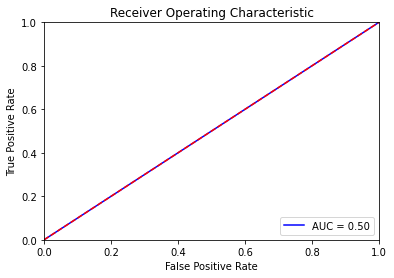

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.601
0.6
[[17  8]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.6 0.68 0.5263157894736842


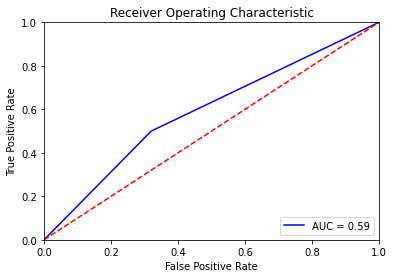

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

,model,mean,std
0,LASSO,0.666667,0.052116
1,DT,0.527778,0.052997
2,KNN,0.572222,0.065499
3,Radial SVM,0.561111,0.032867
4,Linear SVM,0.611111,0.024845


In [ ]:
model2_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

,model,mean,std
0,LASSO,0.65750,0.051781
1,DT,0.51750,0.050062
2,KNN,0.54875,0.058242
3,Radial SVM,0.54125,0.041590
4,Linear SVM,0.59250,0.042793


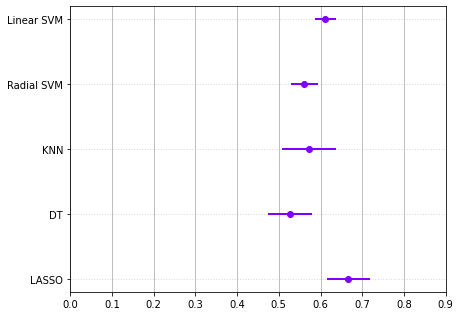

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("UnionBBDD_accuracy"))
# plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

,model,mean,std
0,LASSO,0.5750,0.055902
1,DT,0.4250,0.103078
2,KNN,0.3375,0.089268
3,Radial SVM,0.3625,0.216145
4,Linear SVM,0.4250,0.219374


In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


,model,mean,std
0,LASSO,0.74,0.060000
1,DT,0.61,0.117898
2,KNN,0.76,0.146969
3,Radial SVM,0.72,0.164924
4,Linear SVM,0.76,0.138564


# ***UNIÓN DE 5 BBDD***

# ***PRIMERA PARTICIÓN***

In [ ]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [ ]:
X_train_0

,HighBGLevTakeAction,LowBGLevTakeAction,PtCurrA1cGoal,DealHypoEp_Neutral,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,...,SymbDigWNumErr,SymbDigOTotCorr,TrailMakATotTime,TrailMakBTotTime,GrPegDomHand,GrPegDomNumDrops,GrPegNonNumDrops,DukeSocIntScore,ReadCardLowLine_20/25,ReadCardLowLine_20/80
143,125.0,70.0,70.0,1,7.5,0.017,0.51,93.0,6.0,45.0,...,0.0,57.0,20,56.0,1.0,1.0,1.0,11.0,1,0
24,150.0,70.0,70.0,0,9.0,0.017,0.85,208.0,NaN,30.0,...,1.0,34.0,41,96.0,1.0,0.0,0.0,8.0,0,0
168,275.0,45.0,61.0,0,6.3,0.017,0.64,113.0,NaN,NaN,...,5.0,45.0,34,104.0,1.0,0.0,0.0,10.0,0,0
189,250.0,90.0,69.0,1,7.8,0.109,0.73,346.0,NaN,NaN,...,0.0,45.0,24,86.0,1.0,0.0,0.0,12.0,0,0
69,125.0,68.0,54.0,0,6.7,0.017,0.68,126.0,NaN,22.0,...,0.0,39.0,46,104.0,1.0,0.0,0.0,7.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,300.0,60.0,60.0,0,10.2,0.017,1.05,59.0,NaN,0.0,...,3.0,40.0,40,261.0,1.0,2.0,6.0,5.0,0,1
83,300.0,70.0,80.0,0,7.7,0.023,0.72,92.0,NaN,NaN,...,0.0,NaN,32,88.0,1.0,0.0,1.0,9.0,0,0
207,175.0,80.0,68.0,1,6.2,0.017,0.62,295.0,6.0,22.0,...,0.0,65.0,26,79.0,1.0,0.0,3.0,10.0,0,0
117,150.0,70.0,58.0,1,6.8,0.017,0.91,194.0,6.0,70.0,...,2.0,45.0,36,82.0,1.0,2.0,3.0,6.0,1,0


In [ ]:
from statistics import mode

for i in X_train_0:
  try:
    X_train_0[i].replace(np.nan, mode(X_train_0[i]), inplace=True)
    X_test_0[i].replace(np.nan, mode(X_train_0[i]), inplace=True)
  except:
    print(i)


LastFoodIntakeCarbs


Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_0, Y_train_0, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_0)

# transform the dataset
X_train_0 = imputer.transform(X_train_0)

# print total missing
print('Missing: %d' % sum(isnan(X_train_0).flatten()))

X_test_0=imputer.transform(X_test_0)
print('Missing: %d' % sum(isnan(X_test_0).flatten()))


Missing: 0
Missing: 0


In [ ]:
X

,HighBGLevTakeAction,LowBGLevTakeAction,PtCurrA1cGoal,DealHypoEp_Neutral,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,...,SymbDigWNumErr,SymbDigOTotCorr,TrailMakATotTime,TrailMakBTotTime,GrPegDomHand,GrPegDomNumDrops,GrPegNonNumDrops,DukeSocIntScore,ReadCardLowLine_20/25,ReadCardLowLine_20/80
0,200.0,70.0,65.0,0,7.4,0.017,1.24,132.0,NaN,36.0,...,1.0,35.0,36,164.0,1.0,0.0,0.0,11.0,0,0
1,230.0,70.0,120.0,1,8.6,1.079,0.99,292.0,NaN,NaN,...,0.0,31.0,32,NaN,1.0,0.0,0.0,7.0,0,0
2,250.0,50.0,60.0,0,6.4,0.017,1.32,148.0,NaN,NaN,...,0.0,34.0,38,134.0,1.0,0.0,0.0,8.0,0,0
3,150.0,60.0,58.0,0,7.2,0.017,0.89,262.0,NaN,NaN,...,3.0,48.0,32,95.0,1.0,0.0,0.0,7.0,0,0
4,150.0,60.0,NaN,0,6.4,0.017,0.66,133.0,NaN,NaN,...,1.0,16.0,72,NaN,1.0,4.0,2.0,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,250.0,70.0,70.0,0,7.5,0.017,1.48,53.0,5.0,30.0,...,0.0,16.0,78,269.0,1.0,0.0,0.0,8.0,0,0
219,400.0,65.0,78.0,1,7.5,0.017,0.61,405.0,4.0,45.0,...,0.0,39.0,45,101.0,1.0,0.0,0.0,8.0,0,0
220,200.0,65.0,70.0,0,7.0,0.043,0.80,206.0,NaN,45.0,...,0.0,35.0,65,225.0,1.0,0.0,0.0,9.0,0,0
221,150.0,75.0,78.0,0,8.8,0.017,1.02,381.0,NaN,80.0,...,0.0,61.0,34,61.0,1.0,0.0,0.0,8.0,0,0


In [ ]:
X.columns

Index(['HighBGLevTakeAction', 'LowBGLevTakeAction', 'PtCurrA1cGoal',
       'DealHypoEp_Neutral', 'Value_HBA1C', 'Value_CPEP', 'Value_CREAS',
       'Value_GLU', 'NumMeterCheckDayMeter', 'LastFoodIntakeCarbs',
       'Weight_mod', 'Height_mod', 'MoCAVisEx', 'MoCAAtt2', 'MoCALang2',
       'MoCADelRec', 'SymbDigWTotCorr', 'SymbDigWNumErr', 'SymbDigOTotCorr',
       'TrailMakATotTime', 'TrailMakBTotTime', 'GrPegDomHand',
       'GrPegDomNumDrops', 'GrPegNonNumDrops', 'DukeSocIntScore',
       'ReadCardLowLine_20/25', 'ReadCardLowLine_20/80'],
      dtype='object')

In [ ]:
X_train_numerical0=X_train_0[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_train_categorical0=X_train_0[:,[3,13,14,21,25,26]]
X_test_numerical0=X_test_0[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_test_categorical0=X_test_0[:,[3,13,14,21,25,26]]



In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [ ]:
X_train_scaler_all0.shape

(178, 27)

A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.651
0.6222222222222222
[[19  6]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.6222222222222222 0.76 0.5142857142857143


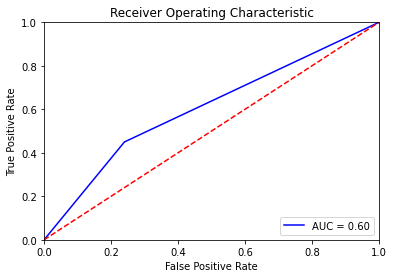

{'max_depth': 5, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.680
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 5}
0.5777777777777777
[[18  7]
 [12  8]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.4 0.5777777777777777 0.72 0.4571428571428572


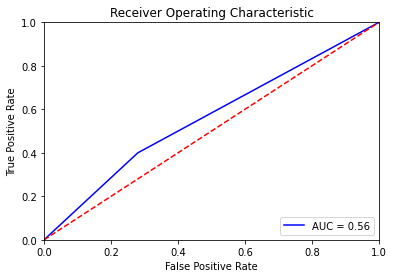

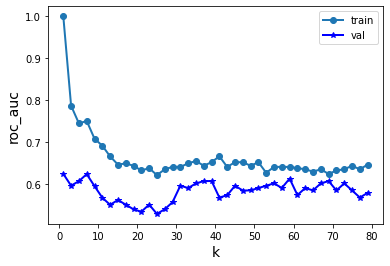

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.624
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}
0.5777777777777777
[[15 10]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.5777777777777777 0.6 0.5365853658536585


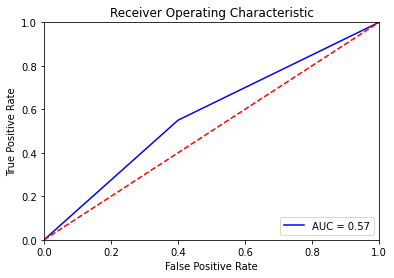

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.674
0.5555555555555556
[[18  7]
 [13  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.35 0.5555555555555556 0.72 0.4117647058823529


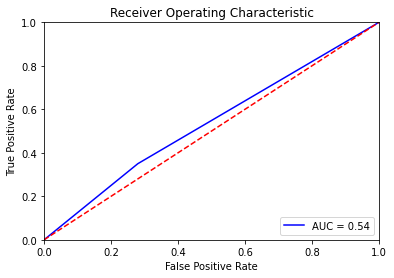

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.668
0.6
[[20  5]
 [13  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.35 0.6 0.8 0.4375


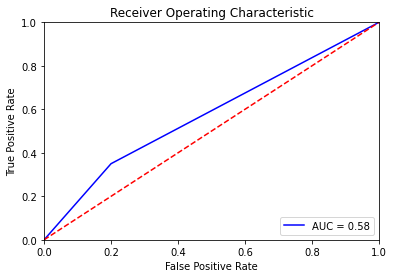

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Segunda partición***

In [ ]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]

In [ ]:
X_train_1.isna().sum()

HighBGLevTakeAction       2
LowBGLevTakeAction        2
PtCurrA1cGoal             3
DealHypoEp_Neutral        0
Value_HBA1C               0
Value_CPEP                5
Value_CREAS               4
Value_GLU                 5
NumMeterCheckDayMeter    80
LastFoodIntakeCarbs      41
Weight_mod                1
Height_mod                3
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
SymbDigWTotCorr           8
SymbDigWNumErr            8
SymbDigOTotCorr           9
TrailMakATotTime          0
TrailMakBTotTime          2
GrPegDomHand              2
GrPegDomNumDrops          1
GrPegNonNumDrops          3
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
dtype: int64

In [ ]:
from statistics import mode

for i in X_train_1:
  try:
    X_train_1[i].replace(np.nan, mode(X_train_1[i]), inplace=True)
    X_test_1[i].replace(np.nan, mode(X_train_1[i]), inplace=True)
  except:
    print(i)


Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_1, Y_train_1, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_1)

# transform the dataset
X_train_1 = imputer.transform(X_train_1)

# print total missing
print('Missing: %d' % sum(isnan(X_train_1).flatten()))

X_test_1=imputer.transform(X_test_1)
print('Missing: %d' % sum(isnan(X_test_1).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical1=X_train_1[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_train_categorical1=X_train_1[:,[3,13,14,21,25,26]]
X_test_numerical1=X_test_1[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_test_categorical1=X_test_1[:,[3,13,14,21,25,26]]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.613
0.6444444444444445
[[17  8]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.6444444444444445 0.68 0.6


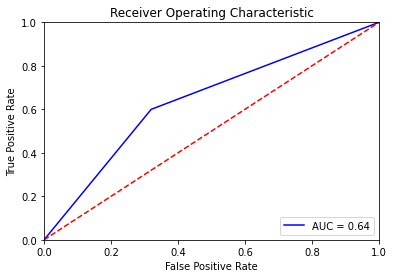

{'max_depth': 1, 'min_samples_leaf': 48}
Mejor ROC-AUC en validación cruzada: 0.658
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 48}
0.5555555555555556
[[14 11]
 [ 9 11]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.55 0.5555555555555556 0.56 0.5238095238095238


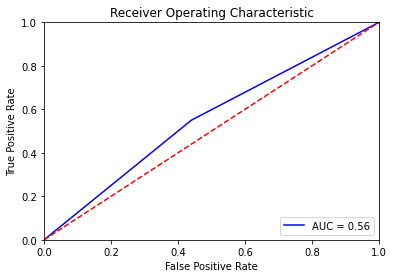

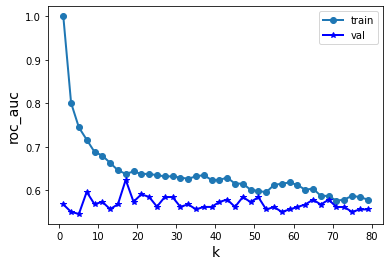

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.624
Valor correspondiente para el hiperparámetro: {'n_neighbors': 17}
0.5555555555555556
[[17  8]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.5555555555555556 0.68 0.4444444444444445


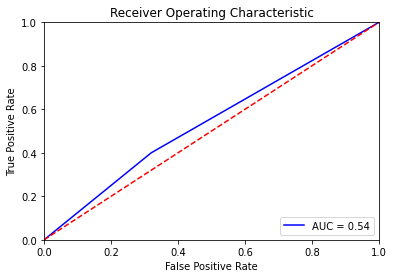

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.646
0.5777777777777777
[[14 11]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.5777777777777777 0.56 0.5581395348837209


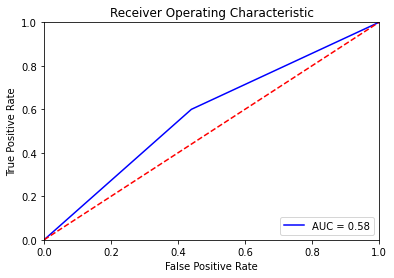

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.607
0.6
[[13 12]
 [ 6 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7 0.6 0.52 0.608695652173913


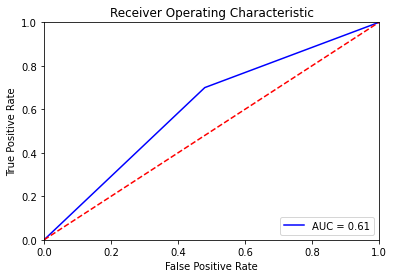

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Tercera partición***

In [ ]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [ ]:
X_train_2.isna().sum()

HighBGLevTakeAction       1
LowBGLevTakeAction        1
PtCurrA1cGoal             5
DealHypoEp_Neutral        0
Value_HBA1C               0
Value_CPEP                4
Value_CREAS               5
Value_GLU                 4
NumMeterCheckDayMeter    78
LastFoodIntakeCarbs      37
Weight_mod                1
Height_mod                3
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
SymbDigWTotCorr           4
SymbDigWNumErr            4
SymbDigOTotCorr           6
TrailMakATotTime          0
TrailMakBTotTime          3
GrPegDomHand              2
GrPegDomNumDrops          2
GrPegNonNumDrops          3
DukeSocIntScore           0
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
dtype: int64

In [ ]:
from statistics import mode

for i in X_train_2:
  try:
    X_train_2[i].replace(np.nan, mode(X_train_2[i]), inplace=True)
    X_test_2[i].replace(np.nan, mode(X_train_2[i]), inplace=True)
  except:
    print(i)


LastFoodIntakeCarbs


Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=15, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_2)

# transform the dataset
X_train_2 = imputer.transform(X_train_2)

# print total missing
print('Missing: %d' % sum(isnan(X_train_2).flatten()))

X_test_2=imputer.transform(X_test_2)
print('Missing: %d' % sum(isnan(X_test_2).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical2=X_train_2[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_train_categorical2=X_train_2[:,[3,13,14,21,25,26]]
X_test_numerical2=X_test_2[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_test_categorical2=X_test_2[:,[3,13,14,21,25,26]]




In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.601
0.5333333333333333
[[15 10]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.5333333333333333 0.6 0.46153846153846156


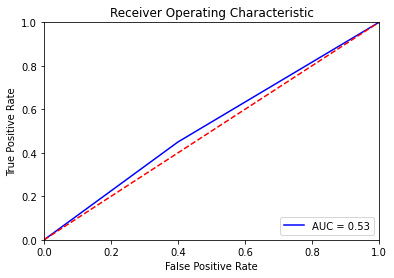

{'max_depth': 3, 'min_samples_leaf': 7}
Mejor ROC-AUC en validación cruzada: 0.624
Mejor valor del hiperparámetro: {'max_depth': 3, 'min_samples_leaf': 7}
0.4444444444444444
[[12 13]
 [12  8]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.4 0.4444444444444444 0.48 0.3902439024390244


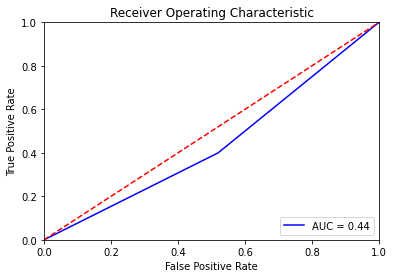

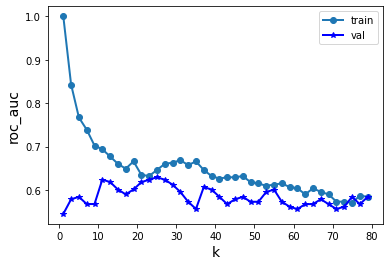

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.629
Valor correspondiente para el hiperparámetro: {'n_neighbors': 25}
0.4888888888888889
[[15 10]
 [13  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.35 0.4888888888888889 0.6 0.37837837837837834


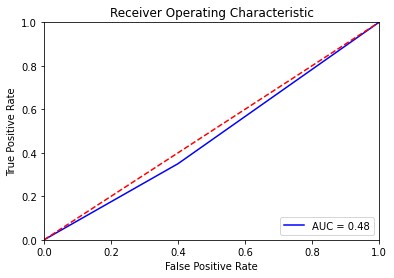

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.612
0.5777777777777777
[[15 10]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.5777777777777777 0.6 0.5365853658536585


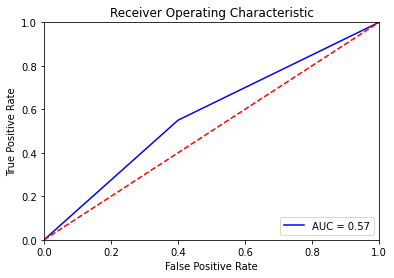

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.589
0.5777777777777777
[[17  8]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.5777777777777777 0.68 0.48648648648648646


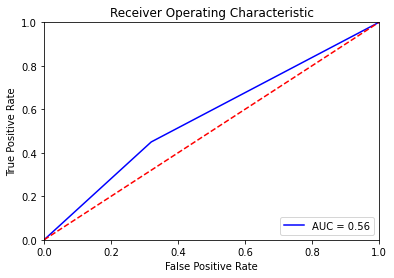

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Cuarta partición***

In [ ]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [ ]:
X_train_3.isna().sum()

HighBGLevTakeAction       2
LowBGLevTakeAction        2
PtCurrA1cGoal             4
DealHypoEp_Neutral        0
Value_HBA1C               0
Value_CPEP                3
Value_CREAS               3
Value_GLU                 2
NumMeterCheckDayMeter    83
LastFoodIntakeCarbs      38
Weight_mod                1
Height_mod                3
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
SymbDigWTotCorr           7
SymbDigWNumErr            7
SymbDigOTotCorr           8
TrailMakATotTime          0
TrailMakBTotTime          5
GrPegDomHand              1
GrPegDomNumDrops          2
GrPegNonNumDrops          4
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
dtype: int64

In [ ]:
from statistics import mode

for i in X_train_3:
  try:
    X_train_3[i].replace(np.nan, mode(X_train_3[i]), inplace=True)
    X_test_3[i].replace(np.nan, mode(X_train_3[i]), inplace=True)
  except:
    print(i)


Value_GLU
LastFoodIntakeCarbs


Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_3, Y_train_3, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5 ,weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_3)

# transform the dataset
X_train_3 = imputer.transform(X_train_3)

# print total missing
print('Missing: %d' % sum(isnan(X_train_3).flatten()))

X_test_3=imputer.transform(X_test_3)
print('Missing: %d' % sum(isnan(X_test_3).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical3=X_train_3[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_train_categorical3=X_train_3[:,[3,13,14,21,25,26]]
X_test_numerical3=X_test_3[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_test_categorical3=X_test_3[:,[3,13,14,21,25,26]]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.613
0.6666666666666666
[[19  6]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.6666666666666666 0.76 0.5945945945945946


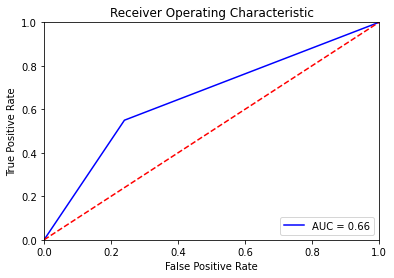

{'max_depth': 3, 'min_samples_leaf': 9}
Mejor ROC-AUC en validación cruzada: 0.619
Mejor valor del hiperparámetro: {'max_depth': 3, 'min_samples_leaf': 9}
0.6666666666666666
[[21  4]
 [11  9]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.45 0.6666666666666666 0.84 0.5454545454545455


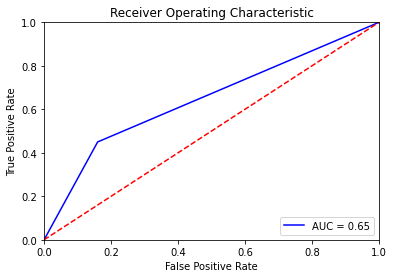

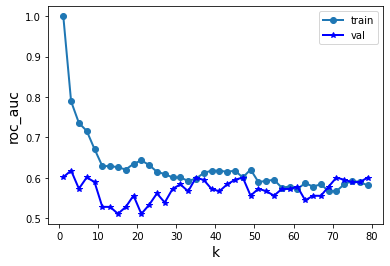

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.618
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.6222222222222222
[[17  8]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.6222222222222222 0.68 0.5641025641025641


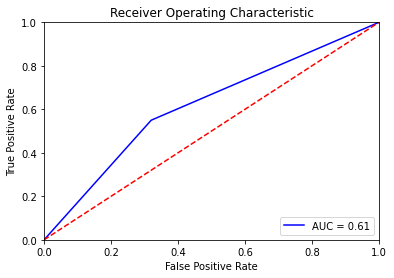

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.602
0.7333333333333333
[[20  5]
 [ 7 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.65 0.7333333333333333 0.8 0.6842105263157895


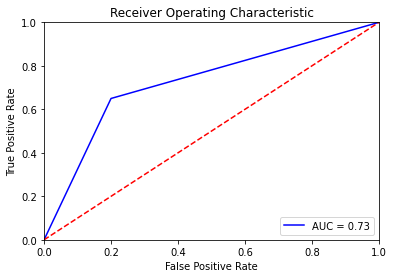

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.573
0.6666666666666666
[[20  5]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.6666666666666666 0.8 0.5714285714285715


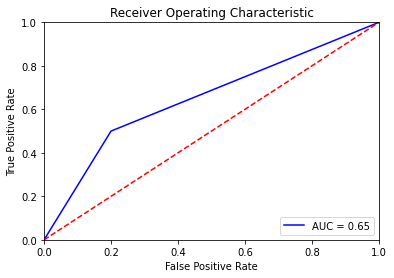

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Quinta partición***

In [ ]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

In [ ]:
X_train_4.isna().sum()

HighBGLevTakeAction      0
LowBGLevTakeAction       0
PtCurrA1cGoal            0
DealHypoEp_Neutral       0
Value_HBA1C              0
Value_CPEP               0
Value_CREAS              5
Value_GLU                5
NumMeterCheckDayMeter    0
LastFoodIntakeCarbs      0
Weight_mod               0
Height_mod               0
MoCAVisEx                0
MoCAAtt2                 0
MoCALang2                0
MoCADelRec               0
SymbDigWTotCorr          0
SymbDigWNumErr           0
SymbDigOTotCorr          0
TrailMakATotTime         0
TrailMakBTotTime         0
GrPegDomHand             0
GrPegDomNumDrops         0
GrPegNonNumDrops         0
DukeSocIntScore          0
ReadCardLowLine_20/25    0
ReadCardLowLine_20/80    0
dtype: int64

In [ ]:
from statistics import mode

for i in X_train_4:
  try:
    X_train_4[i].replace(np.nan, mode(X_train_4[i]), inplace=True)
    X_test_4[i].replace(np.nan, mode(X_train_4[i]), inplace=True)
  except:
    print(i)


Value_HBA1C
Value_CREAS
Value_GLU


Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_4, Y_train_4, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_4)

# transform the dataset
X_train_4 = imputer.transform(X_train_4)

# print total missing
print('Missing: %d' % sum(isnan(X_train_4).flatten()))

X_test_4=imputer.transform(X_test_4)
print('Missing: %d' % sum(isnan(X_test_4).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical4=X_train_4[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_train_categorical4=X_train_4[:,[3,13,14,21,25,26]]
X_test_numerical4=X_test_4[:,[0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,23,24]]
X_test_categorical4=X_test_4[:,[3,13,14,21,25,26]]


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.590
0.6666666666666666
[[20  5]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.6666666666666666 0.8 0.5714285714285715


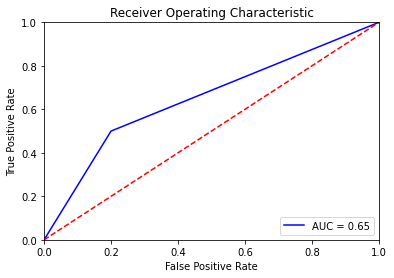

{'max_depth': 3, 'min_samples_leaf': 7}
Mejor ROC-AUC en validación cruzada: 0.668
Mejor valor del hiperparámetro: {'max_depth': 3, 'min_samples_leaf': 7}
0.6
[[20  5]
 [13  7]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.35 0.6 0.8 0.4375


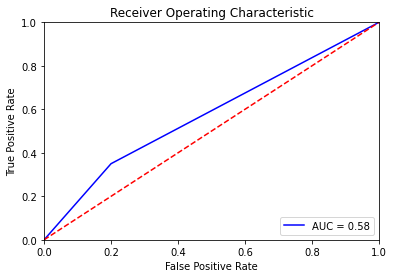

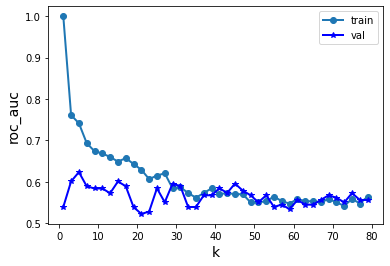

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.624
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.6
[[17  8]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.6 0.68 0.5263157894736842


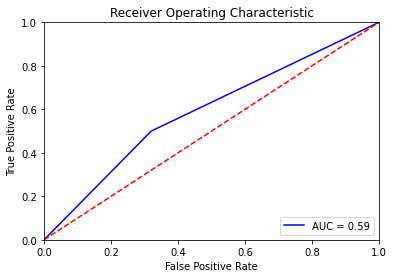

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.601
0.6666666666666666
[[22  3]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.6666666666666666 0.88 0.5161290322580645


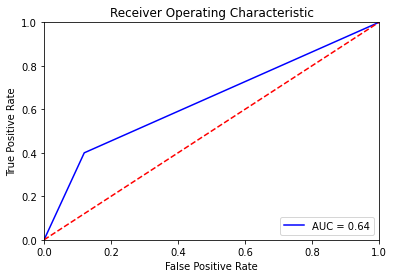

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.579
0.6
[[19  6]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.6 0.76 0.47058823529411764


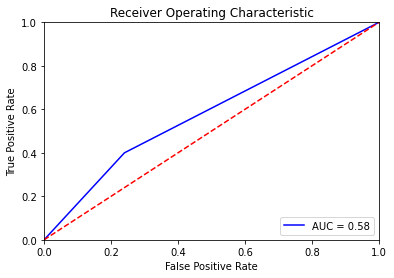

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:


model_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

,model,mean,std
0,LASSO,0.650000,0.018426
1,DT,0.600000,0.041574
2,KNN,0.588889,0.024845
3,Radial SVM,0.633333,0.071146
4,Linear SVM,0.616667,0.028868


In [ ]:
model2_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

,model,mean,std
0,LASSO,0.63750,0.019526
1,DT,0.58375,0.036120
2,KNN,0.58000,0.027157
3,Radial SVM,0.62000,0.071151
4,Linear SVM,0.60375,0.029870


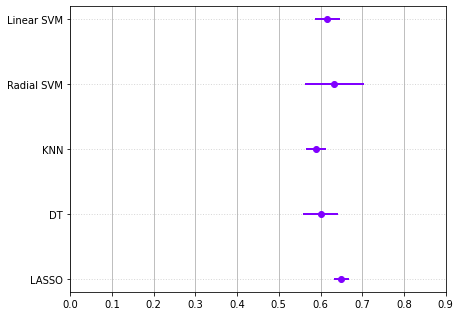

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("UnionBBDD_accuracy"))
# plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

,model,mean,std
0,LASSO,0.5250,0.055902
1,DT,0.4375,0.073951
2,KNN,0.5000,0.061237
3,Radial SVM,0.5000,0.127475
4,Linear SVM,0.4875,0.134048


In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


,model,mean,std
0,LASSO,0.75,0.043589
1,DT,0.73,0.107238
2,KNN,0.66,0.034641
3,Radial SVM,0.74,0.118322
4,Linear SVM,0.72,0.116619


# ***UNIÓN BSAMPLERESULTS CON BMEDCHART***

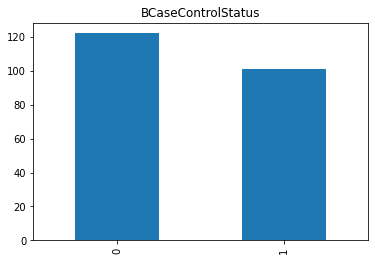

In [ ]:
data['BCaseControlStatus'].value_counts().plot.bar(title="BCaseControlStatus")

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(data[data.columns.difference(['BCaseControlStatus','col'])],data.loc[:,'BCaseControlStatus'])
print(Counter(y_over))

Counter({1: 122, 0: 122})


# ***PRIMERA PARTICIÓN***

In [ ]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [ ]:
X_train_0

,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,Weight_mod,Height_mod
143,7.5,0.017,0.51,93.0,6.0,45.0,53.06,154.94
24,9.0,0.017,0.85,208.0,NaN,30.0,59.59,163.83
168,6.3,0.017,0.64,113.0,NaN,NaN,88.89,165.10
189,7.8,0.109,0.73,346.0,NaN,NaN,51.43,154.94
69,6.7,0.017,0.68,126.0,NaN,22.0,58.90,161.70
...,...,...,...,...,...,...,...,...
173,10.2,0.017,1.05,59.0,NaN,0.0,88.30,175.00
83,7.7,0.023,0.72,92.0,NaN,NaN,82.09,175.00
207,6.2,0.017,0.62,295.0,6.0,22.0,71.56,167.64
117,6.8,0.017,0.91,194.0,6.0,70.0,76.87,177.80


Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_0, Y_train_0, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_0)

# transform the dataset
X_train_0 = imputer.transform(X_train_0)

# print total missing
print('Missing: %d' % sum(isnan(X_train_0).flatten()))

X_test_0=imputer.transform(X_test_0)
print('Missing: %d' % sum(isnan(X_test_0).flatten()))


Missing: 0
Missing: 0


In [ ]:
X

,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,Weight_mod,Height_mod
0,7.4,0.017,1.24,132.0,NaN,36.0,80.73,163.00
1,8.6,1.079,0.99,292.0,NaN,NaN,82.45,180.34
2,6.4,0.017,1.32,148.0,NaN,NaN,98.87,188.98
3,7.2,0.017,0.89,262.0,NaN,NaN,99.14,184.00
4,6.4,0.017,0.66,133.0,NaN,NaN,95.78,188.98
...,...,...,...,...,...,...,...,...
218,7.5,0.017,1.48,53.0,5.0,30.0,113.83,185.42
219,7.5,0.017,0.61,405.0,4.0,45.0,56.69,165.10
220,7.0,0.043,0.80,206.0,NaN,45.0,70.30,167.60
221,8.8,0.017,1.02,381.0,NaN,80.0,85.70,182.80


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_0)
X_train_scaler_all0 = scaler.transform(X_train_0) 
X_test_scaler_all0=scaler.transform(X_test_0)

In [ ]:
X_train_scaler_all0.shape

(178, 8)

A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 40, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.646
0.6444444444444445
[[20  5]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.6444444444444445 0.8 0.5294117647058824


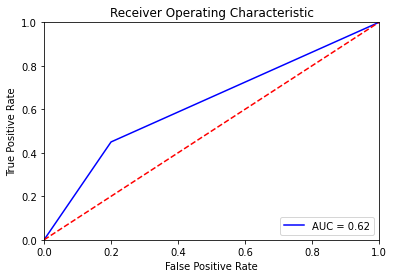

{'max_depth': 5, 'min_samples_leaf': 7}
Mejor ROC-AUC en validación cruzada: 0.618
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 7}
0.6444444444444445
[[22  3]
 [13  7]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.35 0.6444444444444445 0.88 0.4666666666666667


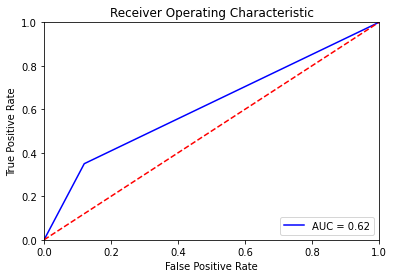

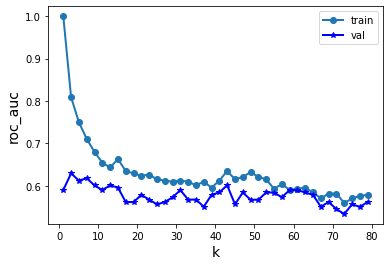

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.629
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.6666666666666666
[[22  3]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.6666666666666666 0.88 0.5161290322580645


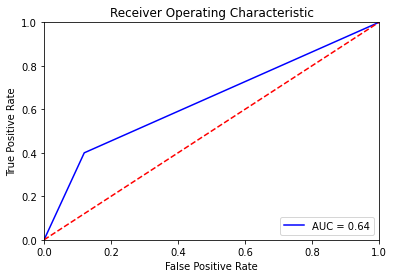

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.624
0.6888888888888889
[[20  5]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.6888888888888889 0.8 0.6111111111111112


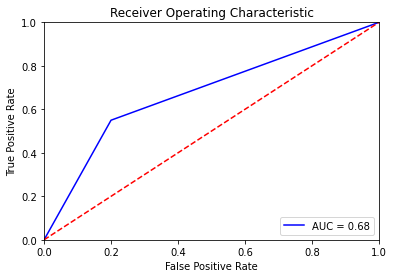

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.641
0.6888888888888889
[[20  5]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.6888888888888889 0.8 0.6111111111111112


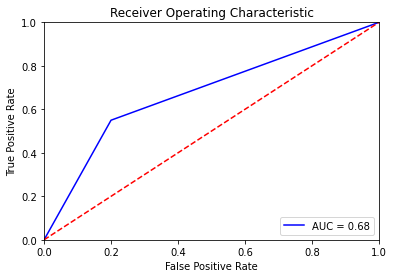

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Segunda partición***

In [ ]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]

In [ ]:
X_train_1.isna().sum()

Value_HBA1C               0
Value_CPEP                5
Value_CREAS               4
Value_GLU                 5
NumMeterCheckDayMeter    80
LastFoodIntakeCarbs      41
Weight_mod                1
Height_mod                3
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_1, Y_train_1, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_1)

# transform the dataset
X_train_1 = imputer.transform(X_train_1)

# print total missing
print('Missing: %d' % sum(isnan(X_train_1).flatten()))

X_test_1=imputer.transform(X_test_1)
print('Missing: %d' % sum(isnan(X_test_1).flatten()))


Missing: 0
Missing: 0


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_1)
X_train_scaler_all1 = scaler.transform(X_train_1) 
X_test_scaler_all1=scaler.transform(X_test_1)

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.613
0.7111111111111111
[[17  8]
 [ 5 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.75 0.7111111111111111 0.68 0.6976744186046512


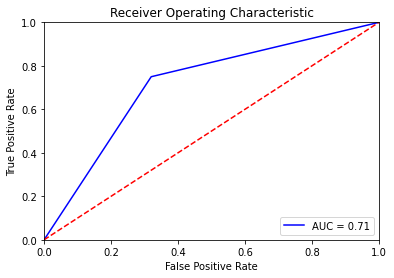

{'max_depth': 4, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.663
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 5}
0.6444444444444445
[[21  4]
 [12  8]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.4 0.6444444444444445 0.84 0.5


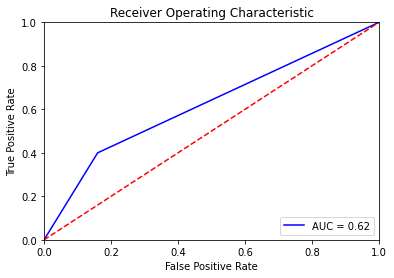

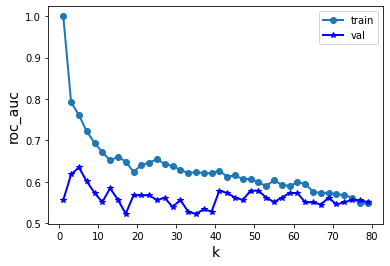

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.635
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.6222222222222222
[[20  5]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.6222222222222222 0.8 0.4848484848484849


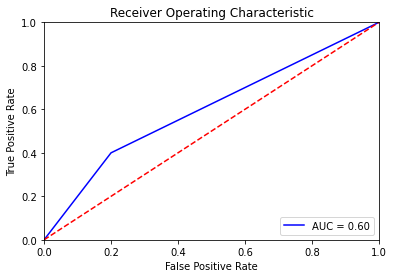

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.641
0.6666666666666666
[[15 10]
 [ 5 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.75 0.6666666666666666 0.6 0.6666666666666665


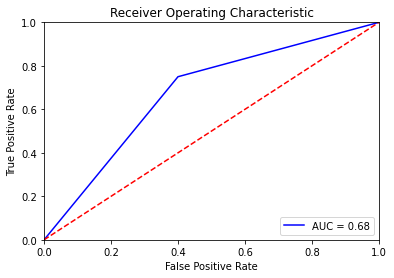

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.647
0.6666666666666666
[[16  9]
 [ 6 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7 0.6666666666666666 0.64 0.6511627906976744


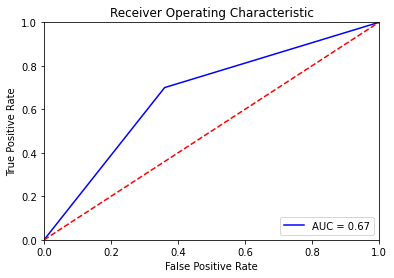

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Tercera partición***

In [ ]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [ ]:
X_train_2.isna().sum()

Value_HBA1C               0
Value_CPEP                4
Value_CREAS               5
Value_GLU                 4
NumMeterCheckDayMeter    78
LastFoodIntakeCarbs      37
Weight_mod                1
Height_mod                3
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_2)

# transform the dataset
X_train_2 = imputer.transform(X_train_2)

# print total missing
print('Missing: %d' % sum(isnan(X_train_2).flatten()))

X_test_2=imputer.transform(X_test_2)
print('Missing: %d' % sum(isnan(X_test_2).flatten()))


Missing: 0
Missing: 0


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_2)
X_train_scaler_all2 = scaler.transform(X_train_2) 
X_test_scaler_all2=scaler.transform(X_test_2)

A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.595
0.6
[[19  6]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.6 0.76 0.47058823529411764


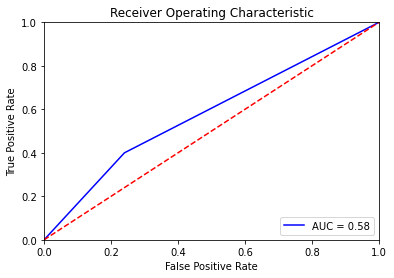

{'max_depth': 4, 'min_samples_leaf': 7}
Mejor ROC-AUC en validación cruzada: 0.634
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 7}
0.6
[[24  1]
 [17  3]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.15 0.6 0.96 0.24999999999999997


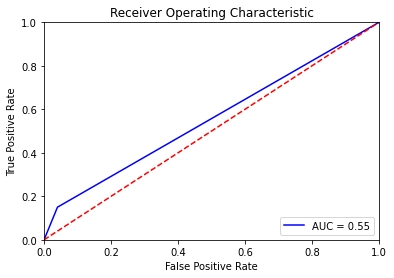

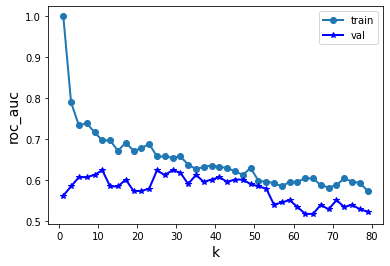

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.624
Valor correspondiente para el hiperparámetro: {'n_neighbors': 29}
0.6666666666666666
[[23  2]
 [13  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.35 0.6666666666666666 0.92 0.48275862068965514


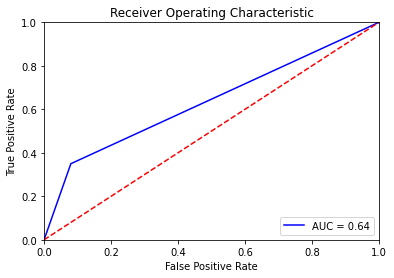

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.640
0.5777777777777777
[[19  6]
 [13  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.35 0.5777777777777777 0.76 0.4242424242424242


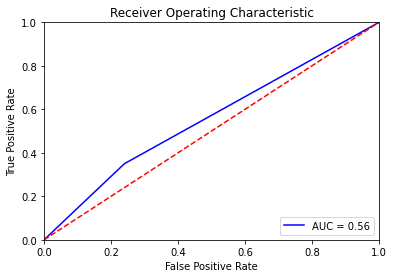

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.635
0.6
[[19  6]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.6 0.76 0.47058823529411764


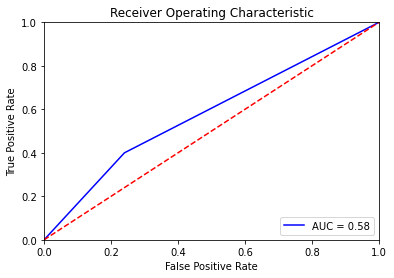

In [ ]:
# #VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Cuarta partición***

In [ ]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [ ]:
X_train_3.isna().sum()

Value_HBA1C               0
Value_CPEP                3
Value_CREAS               3
Value_GLU                 2
NumMeterCheckDayMeter    83
LastFoodIntakeCarbs      38
Weight_mod                1
Height_mod                3
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_3, Y_train_3, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5 ,weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_3)

# transform the dataset
X_train_3 = imputer.transform(X_train_3)

# print total missing
print('Missing: %d' % sum(isnan(X_train_3).flatten()))

X_test_3=imputer.transform(X_test_3)
print('Missing: %d' % sum(isnan(X_test_3).flatten()))


Missing: 0
Missing: 0


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_3)
X_train_scaler_all3 = scaler.transform(X_train_3) 
X_test_scaler_all3=scaler.transform(X_test_3)

A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.601
0.7333333333333333
[[20  5]
 [ 7 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.65 0.7333333333333333 0.8 0.6842105263157895


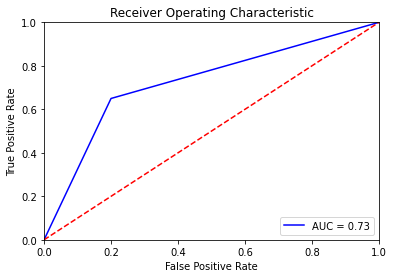

{'max_depth': 6, 'min_samples_leaf': 7}
Mejor ROC-AUC en validación cruzada: 0.584
Mejor valor del hiperparámetro: {'max_depth': 6, 'min_samples_leaf': 7}
0.5111111111111111
[[14 11]
 [11  9]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.45 0.5111111111111111 0.56 0.45


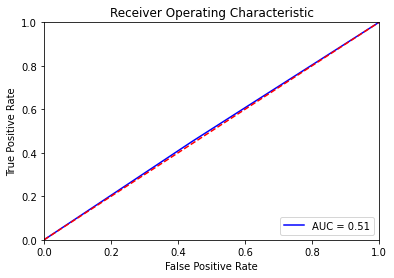

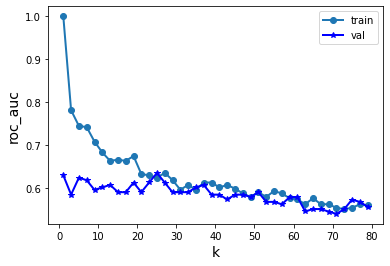

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.635
Valor correspondiente para el hiperparámetro: {'n_neighbors': 25}
0.6444444444444445
[[18  7]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.6444444444444445 0.72 0.5789473684210527


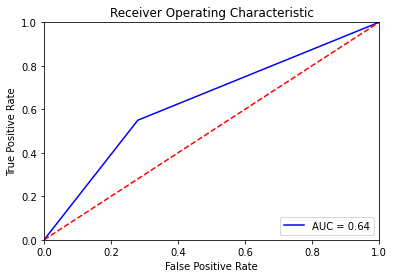

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.624
0.6888888888888889
[[21  4]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.6888888888888889 0.84 0.588235294117647


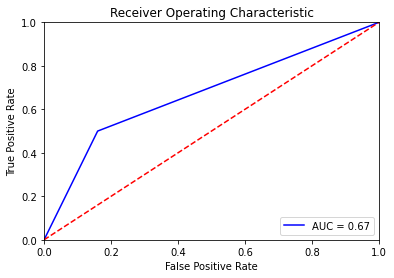

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.624
0.7333333333333333
[[20  5]
 [ 7 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.65 0.7333333333333333 0.8 0.6842105263157895


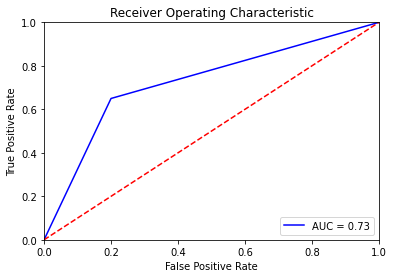

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Quinta partición***

In [ ]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

In [ ]:
X_train_4.isna().sum()

Value_HBA1C               0
Value_CPEP                5
Value_CREAS               5
Value_GLU                 5
NumMeterCheckDayMeter    84
LastFoodIntakeCarbs      37
Weight_mod                1
Height_mod                3
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_4, Y_train_4, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=18, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_4)

# transform the dataset
X_train_4 = imputer.transform(X_train_4)

# print total missing
print('Missing: %d' % sum(isnan(X_train_4).flatten()))

X_test_4=imputer.transform(X_test_4)
print('Missing: %d' % sum(isnan(X_test_4).flatten()))


Missing: 0
Missing: 0


In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_4)
X_train_scaler_all4 = scaler.transform(X_train_4) 
X_test_scaler_all4=scaler.transform(X_test_4)

A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.629
0.6444444444444445
[[18  7]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.6444444444444445 0.72 0.5789473684210527


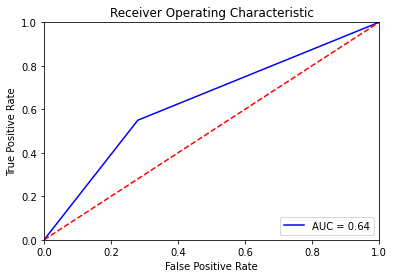

{'max_depth': 5, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.623
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 5}
0.6222222222222222
[[18  7]
 [10 10]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.5 0.6222222222222222 0.72 0.5405405405405405


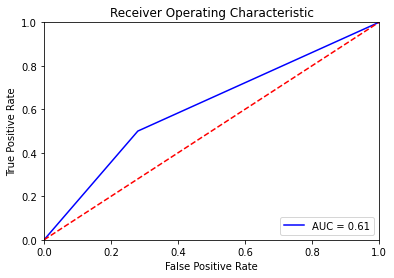

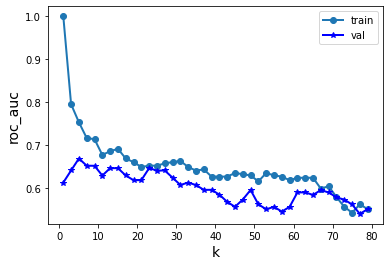

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.669
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.5333333333333333
[[16  9]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.5333333333333333 0.64 0.4324324324324324


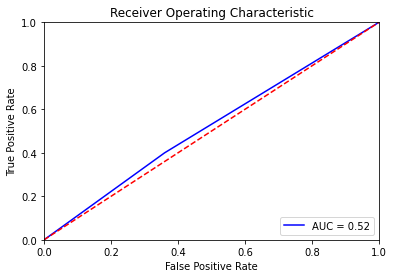

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.646
0.6222222222222222
[[16  9]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.6222222222222222 0.64 0.5853658536585366


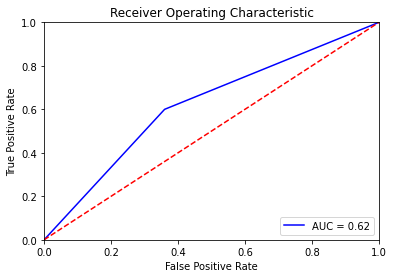

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.651
0.6222222222222222
[[16  9]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.6222222222222222 0.64 0.5853658536585366


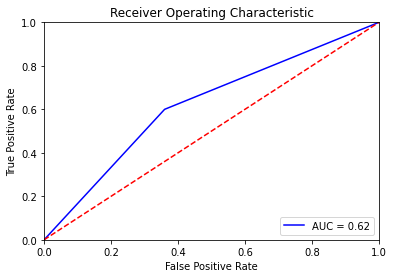

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

,model,mean,std
0,LASSO,0.666667,0.048686
1,DT,0.604444,0.049491
2,KNN,0.626667,0.049491
3,Radial SVM,0.648889,0.043090
4,Linear SVM,0.662222,0.047454


In [ ]:
model2_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

,model,mean,std
0,LASSO,0.656,0.055534
1,DT,0.581,0.044654
2,KNN,0.606,0.045321
3,Radial SVM,0.639,0.046840
4,Linear SVM,0.654,0.049739


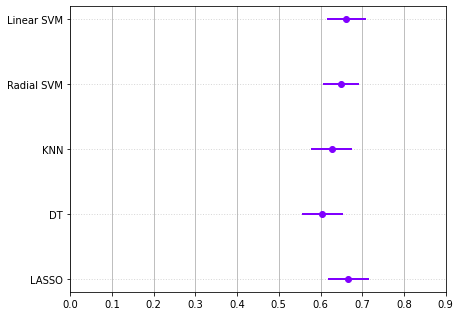

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("UnionBBDD_accuracy"))
# plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

,model,mean,std
0,LASSO,0.56,0.128062
1,DT,0.37,0.120830
2,KNN,0.42,0.067823
3,Radial SVM,0.55,0.130384
4,Linear SVM,0.58,0.102956


In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


,model,mean,std
0,LASSO,0.752,0.046648
1,DT,0.792,0.139485
2,KNN,0.792,0.102450
3,Radial SVM,0.728,0.092607
4,Linear SVM,0.728,0.073321


# ***UNIÓN BSAMPLERESULTS, MEDCHART, TOTTESTSCORES***

# ***PRIMERA PARTICIÓN***

In [ ]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [ ]:
X_train_0.isna().sum()

Value_HBA1C               0
Value_CPEP                5
Value_CREAS               5
Value_GLU                 6
NumMeterCheckDayMeter    89
LastFoodIntakeCarbs      41
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           6
SymbDigWNumErr            6
SymbDigOTotCorr           7
TrailMakATotTime          0
TrailMakBTotTime          3
GrPegDomHand              2
GrPegDomNumDrops          1
GrPegNonNumDrops          3
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_0, Y_train_0, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_0)

# transform the dataset
X_train_0 = imputer.transform(X_train_0)

# print total missing
print('Missing: %d' % sum(isnan(X_train_0).flatten()))

X_test_0=imputer.transform(X_test_0)
print('Missing: %d' % sum(isnan(X_test_0).flatten()))


Missing: 0
Missing: 0


In [ ]:
X

,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,Weight_mod,Height_mod,SymbDigWTotCorr,SymbDigWNumErr,SymbDigOTotCorr,TrailMakATotTime,TrailMakBTotTime,GrPegDomHand,GrPegDomNumDrops,GrPegNonNumDrops,DukeSocIntScore,ReadCardLowLine_20/25,ReadCardLowLine_20/80
0,7.4,0.017,1.24,132.0,NaN,36.0,80.73,163.00,28.0,1.0,35.0,36,164.0,1.0,0.0,0.0,11.0,0,0
1,8.6,1.079,0.99,292.0,NaN,NaN,82.45,180.34,28.0,0.0,31.0,32,NaN,1.0,0.0,0.0,7.0,0,0
2,6.4,0.017,1.32,148.0,NaN,NaN,98.87,188.98,35.0,0.0,34.0,38,134.0,1.0,0.0,0.0,8.0,0,0
3,7.2,0.017,0.89,262.0,NaN,NaN,99.14,184.00,50.0,3.0,48.0,32,95.0,1.0,0.0,0.0,7.0,0,0
4,6.4,0.017,0.66,133.0,NaN,NaN,95.78,188.98,16.0,1.0,16.0,72,NaN,1.0,4.0,2.0,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,7.5,0.017,1.48,53.0,5.0,30.0,113.83,185.42,28.0,0.0,16.0,78,269.0,1.0,0.0,0.0,8.0,0,0
219,7.5,0.017,0.61,405.0,4.0,45.0,56.69,165.10,39.0,0.0,39.0,45,101.0,1.0,0.0,0.0,8.0,0,0
220,7.0,0.043,0.80,206.0,NaN,45.0,70.30,167.60,34.0,0.0,35.0,65,225.0,1.0,0.0,0.0,9.0,0,0
221,8.8,0.017,1.02,381.0,NaN,80.0,85.70,182.80,54.0,0.0,61.0,34,61.0,1.0,0.0,0.0,8.0,0,0


In [ ]:
X_train_numerical0=X_train_0[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
X_train_categorical0=X_train_0[:,[13,17,18]]
X_test_numerical0=X_test_0[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
X_test_categorical0=X_test_0[:,[13,17,18]]



In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [ ]:
X_train_scaler_all0.shape

(178, 19)

A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 30, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.680
0.6888888888888889
[[22  3]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.6888888888888889 0.88 0.5625000000000001


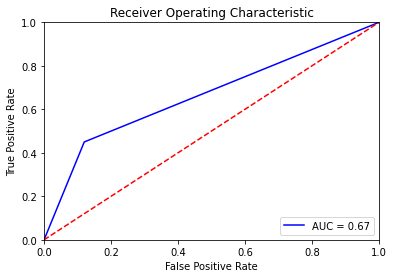

{'max_depth': 5, 'min_samples_leaf': 11}
Mejor ROC-AUC en validación cruzada: 0.624
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 11}
0.5777777777777777
[[18  7]
 [12  8]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.4 0.5777777777777777 0.72 0.4571428571428572


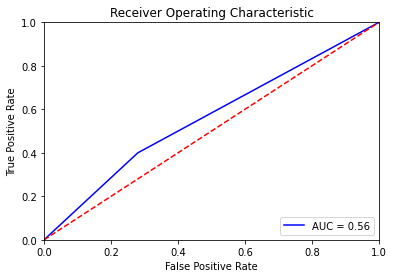

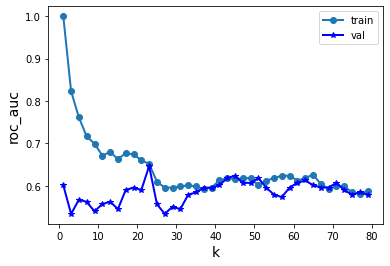

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.646
Valor correspondiente para el hiperparámetro: {'n_neighbors': 23}
0.6666666666666666
[[24  1]
 [14  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.3 0.6666666666666666 0.96 0.4444444444444444


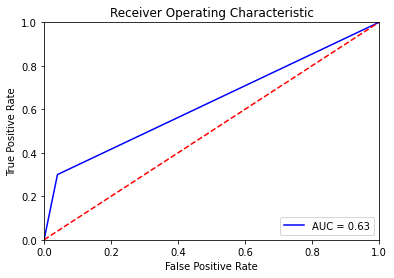

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.691
0.6444444444444445
[[20  5]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.6444444444444445 0.8 0.5294117647058824


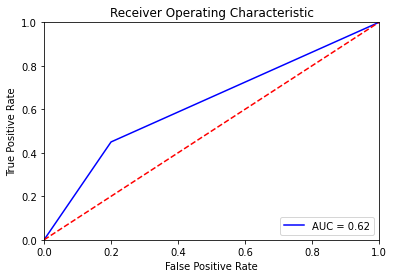

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.669
0.7111111111111111
[[22  3]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.7111111111111111 0.88 0.6060606060606061


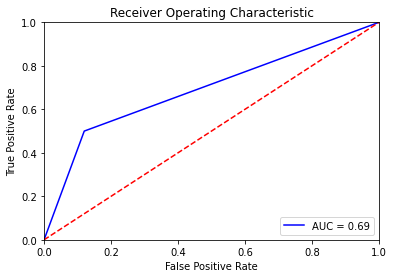

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Segunda partición***

In [ ]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]

In [ ]:
X_train_1.isna().sum()

Value_HBA1C               0
Value_CPEP                5
Value_CREAS               4
Value_GLU                 5
NumMeterCheckDayMeter    80
LastFoodIntakeCarbs      41
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           8
SymbDigWNumErr            8
SymbDigOTotCorr           9
TrailMakATotTime          0
TrailMakBTotTime          2
GrPegDomHand              2
GrPegDomNumDrops          1
GrPegNonNumDrops          3
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_1, Y_train_1, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=18, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_1)

# transform the dataset
X_train_1 = imputer.transform(X_train_1)

# print total missing
print('Missing: %d' % sum(isnan(X_train_1).flatten()))

X_test_1=imputer.transform(X_test_1)
print('Missing: %d' % sum(isnan(X_test_1).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical1=X_train_1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
X_train_categorical1=X_train_1[:,[13,17,18]]
X_test_numerical1=X_test_1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
X_test_categorical1=X_test_1[:,[13,17,18]]




In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.640
0.6666666666666666
[[18  7]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.6666666666666666 0.72 0.6153846153846154


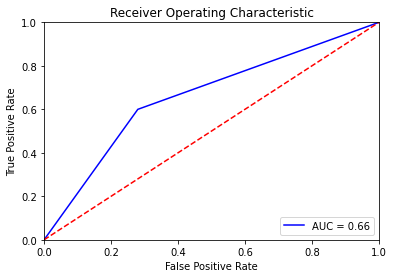

{'max_depth': 4, 'min_samples_leaf': 8}
Mejor ROC-AUC en validación cruzada: 0.612
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 8}
0.6222222222222222
[[15 10]
 [ 7 13]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.65 0.6222222222222222 0.6 0.6046511627906976


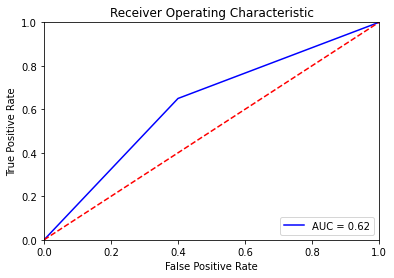

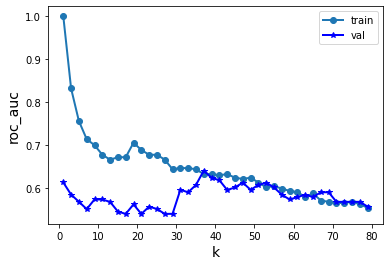

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.640
Valor correspondiente para el hiperparámetro: {'n_neighbors': 37}
0.6666666666666666
[[21  4]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.6666666666666666 0.84 0.5454545454545455


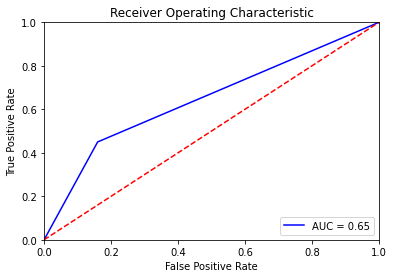

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.641
0.6444444444444445
[[16  9]
 [ 7 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.65 0.6444444444444445 0.64 0.6190476190476191


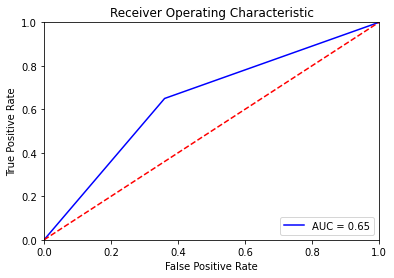

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.641
0.6222222222222222
[[14 11]
 [ 6 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7 0.6222222222222222 0.56 0.6222222222222222


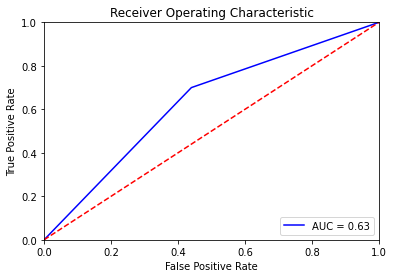

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Tercera partición***

In [ ]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [ ]:
X_train_2.isna().sum()

Value_HBA1C               0
Value_CPEP                4
Value_CREAS               5
Value_GLU                 4
NumMeterCheckDayMeter    78
LastFoodIntakeCarbs      37
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           4
SymbDigWNumErr            4
SymbDigOTotCorr           6
TrailMakATotTime          0
TrailMakBTotTime          3
GrPegDomHand              2
GrPegDomNumDrops          2
GrPegNonNumDrops          3
DukeSocIntScore           0
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=18, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_2)

# transform the dataset
X_train_2 = imputer.transform(X_train_2)

# print total missing
print('Missing: %d' % sum(isnan(X_train_2).flatten()))

X_test_2=imputer.transform(X_test_2)
print('Missing: %d' % sum(isnan(X_test_2).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical2=X_train_2[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_train_categorical2=X_train_2[:,[13,17,18,20,21]]
X_test_numerical2=X_test_2[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_test_categorical2=X_test_2[:,[13,17,18,20,21]]




In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.618
0.5555555555555556
[[15 10]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.5555555555555556 0.6 0.5


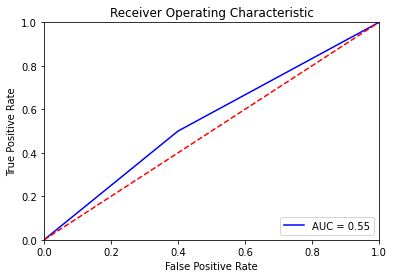

{'max_depth': 4, 'min_samples_leaf': 12}
Mejor ROC-AUC en validación cruzada: 0.607
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 12}
0.5777777777777777
[[14 11]
 [ 8 12]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6 0.5777777777777777 0.56 0.5581395348837209


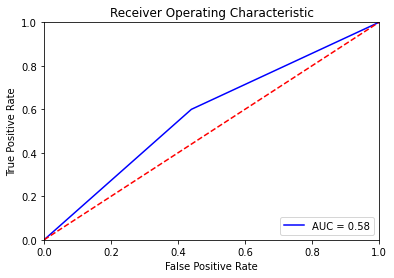

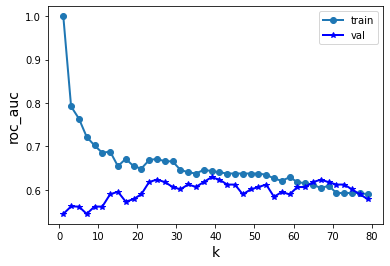

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.629
Valor correspondiente para el hiperparámetro: {'n_neighbors': 39}
0.5333333333333333
[[16  9]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.5333333333333333 0.64 0.4324324324324324


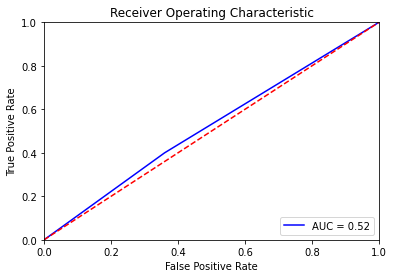

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.640
0.5333333333333333
[[13 12]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.5333333333333333 0.52 0.5116279069767442


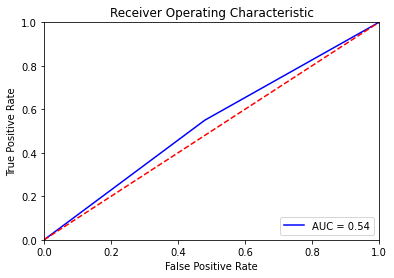

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.606
0.5333333333333333
[[14 11]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.5333333333333333 0.56 0.4878048780487805


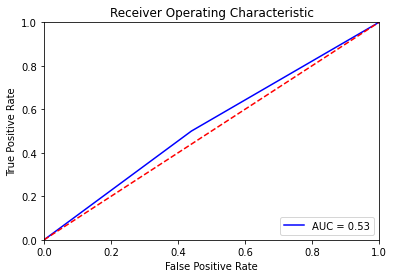

In [ ]:
# #VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Cuarta partición***

In [ ]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [ ]:
X_train_3.isna().sum()

Value_HBA1C               0
Value_CPEP                3
Value_CREAS               3
Value_GLU                 2
NumMeterCheckDayMeter    83
LastFoodIntakeCarbs      38
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           7
SymbDigWNumErr            7
SymbDigOTotCorr           8
TrailMakATotTime          0
TrailMakBTotTime          5
GrPegDomHand              1
GrPegDomNumDrops          2
GrPegNonNumDrops          4
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_3, Y_train_3, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7 ,weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_3)

# transform the dataset
X_train_3 = imputer.transform(X_train_3)

# print total missing
print('Missing: %d' % sum(isnan(X_train_3).flatten()))

X_test_3=imputer.transform(X_test_3)
print('Missing: %d' % sum(isnan(X_test_3).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical3=X_train_3[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
X_train_categorical3=X_train_3[:,[13,17,18]]
X_test_numerical3=X_test_3[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
X_test_categorical3=X_test_3[:,[13,17,18]]




In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.624
0.7111111111111111
[[19  6]
 [ 7 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.65 0.7111111111111111 0.76 0.6666666666666667


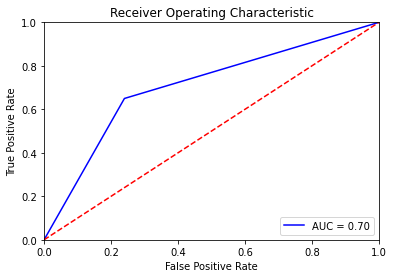

{'max_depth': 2, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.590
Mejor valor del hiperparámetro: {'max_depth': 2, 'min_samples_leaf': 5}
0.6
[[24  1]
 [17  3]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.15 0.6 0.96 0.24999999999999997


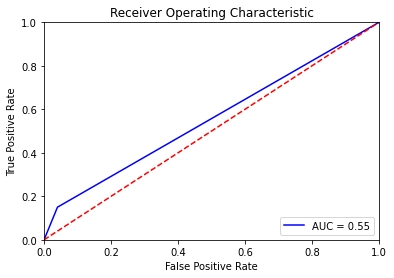

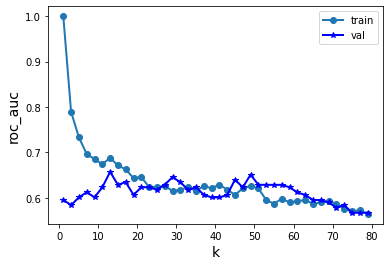

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.657
Valor correspondiente para el hiperparámetro: {'n_neighbors': 13}
0.6222222222222222
[[20  5]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.6222222222222222 0.8 0.4848484848484849


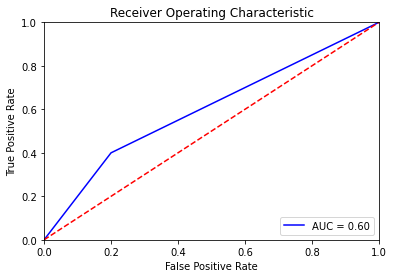

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.618
0.7111111111111111
[[19  6]
 [ 7 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.65 0.7111111111111111 0.76 0.6666666666666667


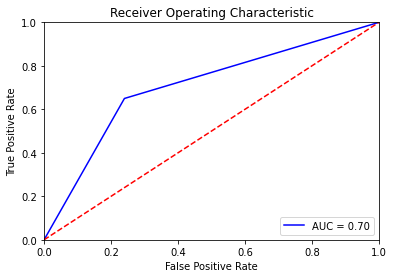

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.597
0.7777777777777778
[[19  6]
 [ 4 16]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.8 0.7777777777777778 0.76 0.761904761904762


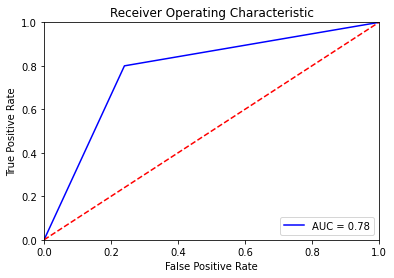

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Quinta partición***

In [ ]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

In [ ]:
X_train_4.isna().sum()

Value_HBA1C               0
Value_CPEP                5
Value_CREAS               5
Value_GLU                 5
NumMeterCheckDayMeter    84
LastFoodIntakeCarbs      37
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           7
SymbDigWNumErr            7
SymbDigOTotCorr           8
TrailMakATotTime          0
TrailMakBTotTime          4
GrPegDomHand              0
GrPegDomNumDrops          2
GrPegNonNumDrops          3
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_4, Y_train_4, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_4)

# transform the dataset
X_train_4 = imputer.transform(X_train_4)

# print total missing
print('Missing: %d' % sum(isnan(X_train_4).flatten()))

X_test_4=imputer.transform(X_test_4)
print('Missing: %d' % sum(isnan(X_test_4).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical4=X_train_4[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
X_train_categorical4=X_train_4[:,[13,17,18]]
X_test_numerical4=X_test_4[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]]
X_test_categorical4=X_test_4[:,[13,17,18]]




In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.590
0.7333333333333333
[[21  4]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.7333333333333333 0.84 0.6666666666666665


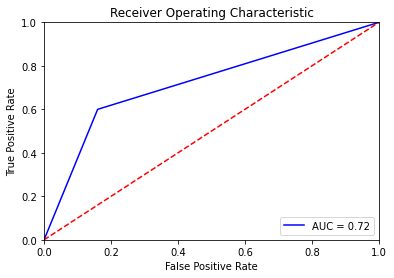

{'max_depth': 4, 'min_samples_leaf': 10}
Mejor ROC-AUC en validación cruzada: 0.624
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 10}
0.6
[[20  5]
 [13  7]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.35 0.6 0.8 0.4375


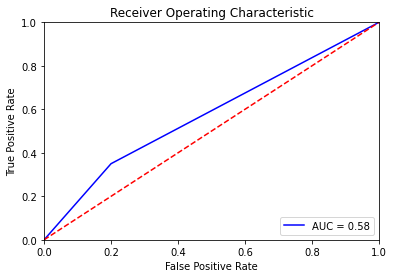

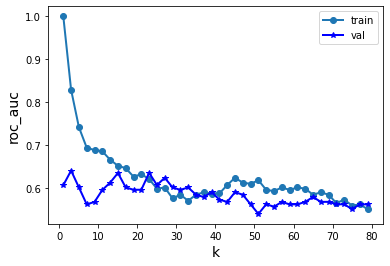

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.640
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.7111111111111111
[[19  6]
 [ 7 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.65 0.7111111111111111 0.76 0.6666666666666667


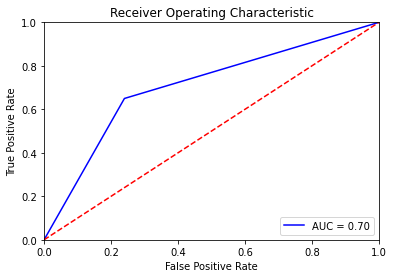

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.579
0.6888888888888889
[[18  7]
 [ 7 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.65 0.6888888888888889 0.72 0.65


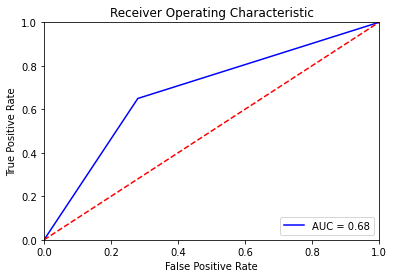

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.6222222222222222
[[25  0]
 [17  3]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.15 0.6222222222222222 1.0 0.2608695652173913


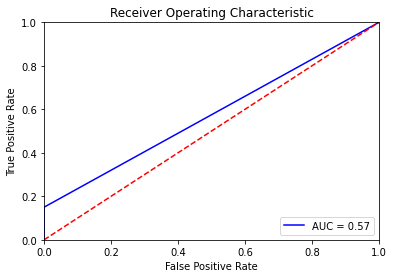

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

,model,mean,std
0,LASSO,0.700000,0.024845
1,DT,0.600000,0.015713
2,KNN,0.666667,0.031427
3,Radial SVM,0.672222,0.028868
4,Linear SVM,0.683333,0.065499


In [ ]:
model2_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

,model,mean,std
0,LASSO,0.68750,0.025617
1,DT,0.57875,0.027698
2,KNN,0.64500,0.038243
3,Radial SVM,0.66500,0.031623
4,Linear SVM,0.66875,0.076024


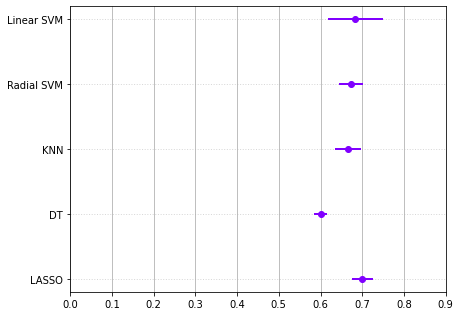

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("UnionBBDD_accuracy"))
# plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

,model,mean,std
0,LASSO,0.5750,0.075000
1,DT,0.3875,0.178098
2,KNN,0.4500,0.127475
3,Radial SVM,0.6000,0.086603
4,Linear SVM,0.5375,0.248433


In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


,model,mean,std
0,LASSO,0.79,0.059161
1,DT,0.76,0.144222
2,KNN,0.86,0.044721
3,Radial SVM,0.72,0.063246
4,Linear SVM,0.78,0.156205


# ***UNIÓN BSAMPLERESULTS, MEDCHART, TOTTESTSCORES, MOCA***

# ***PRIMERA PARTICIÓN***

In [ ]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [ ]:
X_train_0.isna().sum()

Value_HBA1C               0
Value_CPEP                5
Value_CREAS               5
Value_GLU                 6
NumMeterCheckDayMeter    89
LastFoodIntakeCarbs      41
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           6
SymbDigWNumErr            6
SymbDigOTotCorr           7
TrailMakATotTime          0
TrailMakBTotTime          3
GrPegDomHand              2
GrPegDomNumDrops          1
GrPegNonNumDrops          3
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_0, Y_train_0, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_0)

# transform the dataset
X_train_0 = imputer.transform(X_train_0)

# print total missing
print('Missing: %d' % sum(isnan(X_train_0).flatten()))

X_test_0=imputer.transform(X_test_0)
print('Missing: %d' % sum(isnan(X_test_0).flatten()))


Missing: 0
Missing: 0


In [ ]:
X

,Value_HBA1C,Value_CPEP,Value_CREAS,Value_GLU,NumMeterCheckDayMeter,LastFoodIntakeCarbs,Weight_mod,Height_mod,SymbDigWTotCorr,SymbDigWNumErr,...,GrPegDomHand,GrPegDomNumDrops,GrPegNonNumDrops,DukeSocIntScore,ReadCardLowLine_20/25,ReadCardLowLine_20/80,MoCAVisEx,MoCAAtt2,MoCALang2,MoCADelRec
0,7.4,0.017,1.24,132.0,NaN,36.0,80.73,163.00,28.0,1.0,...,1.0,0.0,0.0,11.0,0,0,5.0,1.0,0.0,2.0
1,8.6,1.079,0.99,292.0,NaN,NaN,82.45,180.34,28.0,0.0,...,1.0,0.0,0.0,7.0,0,0,4.0,1.0,1.0,1.0
2,6.4,0.017,1.32,148.0,NaN,NaN,98.87,188.98,35.0,0.0,...,1.0,0.0,0.0,8.0,0,0,5.0,1.0,1.0,3.0
3,7.2,0.017,0.89,262.0,NaN,NaN,99.14,184.00,50.0,3.0,...,1.0,0.0,0.0,7.0,0,0,4.0,1.0,0.0,2.0
4,6.4,0.017,0.66,133.0,NaN,NaN,95.78,188.98,16.0,1.0,...,1.0,4.0,2.0,7.0,0,0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,7.5,0.017,1.48,53.0,5.0,30.0,113.83,185.42,28.0,0.0,...,1.0,0.0,0.0,8.0,0,0,2.0,0.0,0.0,3.0
219,7.5,0.017,0.61,405.0,4.0,45.0,56.69,165.10,39.0,0.0,...,1.0,0.0,0.0,8.0,0,0,3.0,1.0,1.0,4.0
220,7.0,0.043,0.80,206.0,NaN,45.0,70.30,167.60,34.0,0.0,...,1.0,0.0,0.0,9.0,0,0,4.0,1.0,1.0,2.0
221,8.8,0.017,1.02,381.0,NaN,80.0,85.70,182.80,54.0,0.0,...,1.0,0.0,0.0,8.0,0,0,5.0,1.0,1.0,3.0


In [ ]:
X_train_numerical0=X_train_0[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_train_categorical0=X_train_0[:,[13,17,18,20,21]]
X_test_numerical0=X_test_0[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_test_categorical0=X_test_0[:,[13,17,18,20,21]]



In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [ ]:
X_train_scaler_all0.shape

(178, 23)

A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.669
0.7111111111111111
[[22  3]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.7111111111111111 0.88 0.6060606060606061


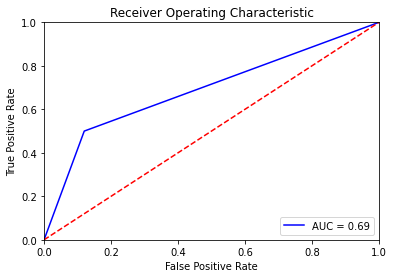

{'max_depth': 5, 'min_samples_leaf': 11}
Mejor ROC-AUC en validación cruzada: 0.624
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 11}
0.5777777777777777
[[18  7]
 [12  8]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.4 0.5777777777777777 0.72 0.4571428571428572


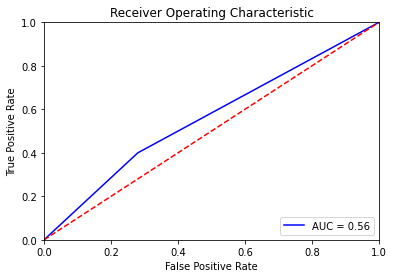

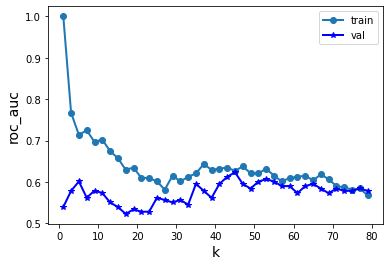

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.623
Valor correspondiente para el hiperparámetro: {'n_neighbors': 45}
0.6222222222222222
[[22  3]
 [14  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.3 0.6222222222222222 0.88 0.41379310344827586


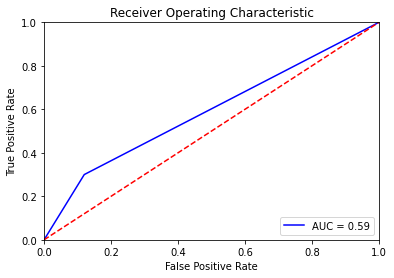

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.652
0.6222222222222222
[[21  4]
 [13  7]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.35 0.6222222222222222 0.84 0.45161290322580644


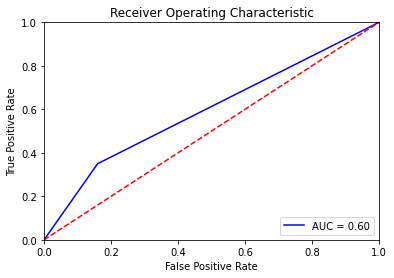

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.646
0.6444444444444445
[[21  4]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.6444444444444445 0.84 0.5


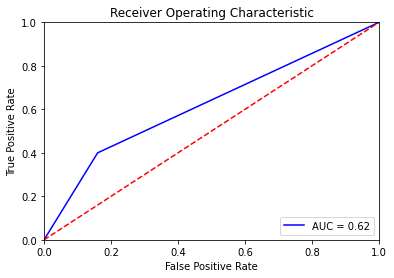

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Segunda partición***

In [ ]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]

In [ ]:
X_train_1.isna().sum()

Value_HBA1C               0
Value_CPEP                5
Value_CREAS               4
Value_GLU                 5
NumMeterCheckDayMeter    80
LastFoodIntakeCarbs      41
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           8
SymbDigWNumErr            8
SymbDigOTotCorr           9
TrailMakATotTime          0
TrailMakBTotTime          2
GrPegDomHand              2
GrPegDomNumDrops          1
GrPegNonNumDrops          3
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_1, Y_train_1, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=18, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_1)

# transform the dataset
X_train_1 = imputer.transform(X_train_1)

# print total missing
print('Missing: %d' % sum(isnan(X_train_1).flatten()))

X_test_1=imputer.transform(X_test_1)
print('Missing: %d' % sum(isnan(X_test_1).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical1=X_train_1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_train_categorical1=X_train_1[:,[13,17,18,20,21]]
X_test_numerical1=X_test_1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_test_categorical1=X_test_1[:,[13,17,18,20,21]]






In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


Valor correspondiente para el hiperparámetro: {'C': 30, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.646
0.6222222222222222
[[16  9]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.6222222222222222 0.64 0.5853658536585366


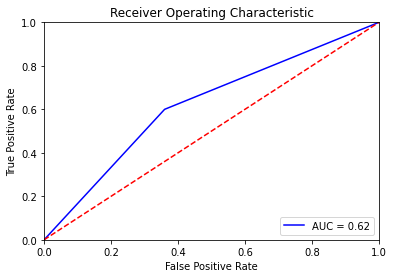

{'max_depth': 4, 'min_samples_leaf': 9}
Mejor ROC-AUC en validación cruzada: 0.607
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 9}
0.5555555555555556
[[14 11]
 [ 9 11]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.55 0.5555555555555556 0.56 0.5238095238095238


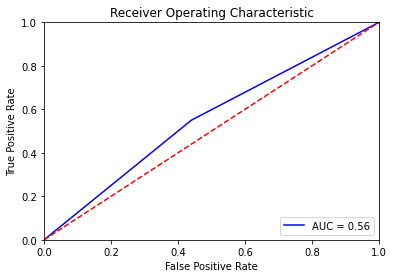

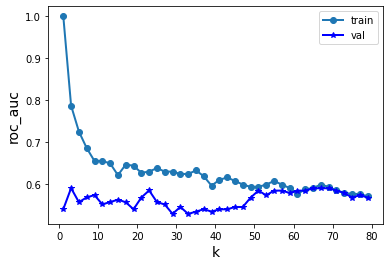

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.590
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.6
[[18  7]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.6 0.72 0.5


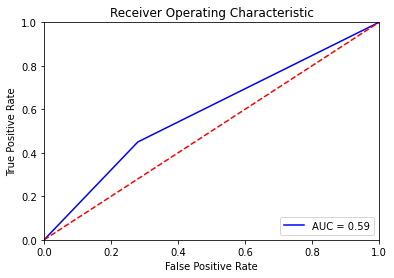

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.652
0.6
[[15 10]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.6 0.6 0.5714285714285713


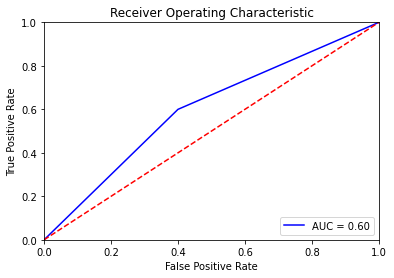

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.663
0.5777777777777777
[[14 11]
 [ 8 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6 0.5777777777777777 0.56 0.5581395348837209


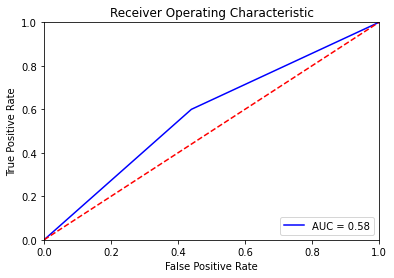

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Tercera partición***

In [ ]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [ ]:
X_train_2.isna().sum()

Value_HBA1C               0
Value_CPEP                4
Value_CREAS               5
Value_GLU                 4
NumMeterCheckDayMeter    78
LastFoodIntakeCarbs      37
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           4
SymbDigWNumErr            4
SymbDigOTotCorr           6
TrailMakATotTime          0
TrailMakBTotTime          3
GrPegDomHand              2
GrPegDomNumDrops          2
GrPegNonNumDrops          3
DukeSocIntScore           0
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=18, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_2)

# transform the dataset
X_train_2 = imputer.transform(X_train_2)

# print total missing
print('Missing: %d' % sum(isnan(X_train_2).flatten()))

X_test_2=imputer.transform(X_test_2)
print('Missing: %d' % sum(isnan(X_test_2).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical2=X_train_2[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_train_categorical2=X_train_2[:,[13,17,18,20,21]]
X_test_numerical2=X_test_2[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_test_categorical2=X_test_2[:,[13,17,18,20,21]]



In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.618
0.5555555555555556
[[15 10]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.5555555555555556 0.6 0.5


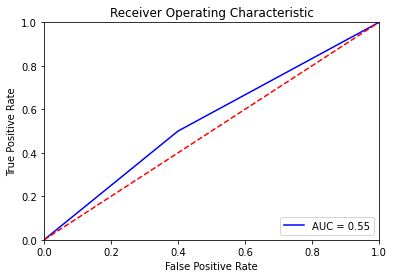

{'max_depth': 4, 'min_samples_leaf': 12}
Mejor ROC-AUC en validación cruzada: 0.607
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 12}
0.5777777777777777
[[14 11]
 [ 8 12]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6 0.5777777777777777 0.56 0.5581395348837209


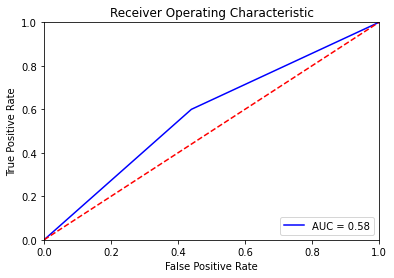

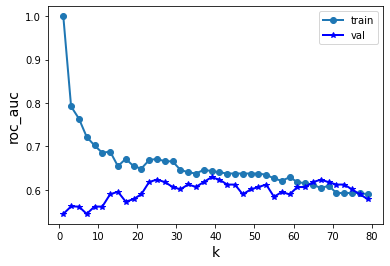

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.629
Valor correspondiente para el hiperparámetro: {'n_neighbors': 39}
0.5333333333333333
[[16  9]
 [12  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.4 0.5333333333333333 0.64 0.4324324324324324


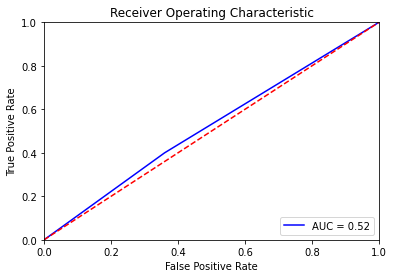

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.640
0.5333333333333333
[[13 12]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.5333333333333333 0.52 0.5116279069767442


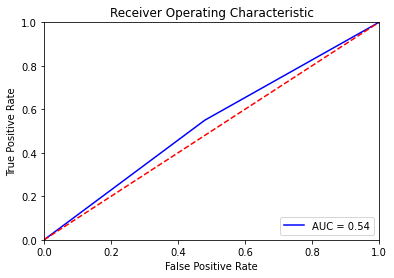

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.606
0.5333333333333333
[[14 11]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.5333333333333333 0.56 0.4878048780487805


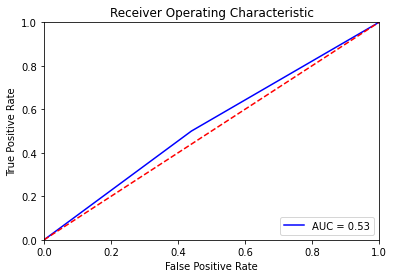

In [ ]:
# #VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Cuarta partición***

In [ ]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [ ]:
X_train_3.isna().sum()

Value_HBA1C               0
Value_CPEP                3
Value_CREAS               3
Value_GLU                 2
NumMeterCheckDayMeter    83
LastFoodIntakeCarbs      38
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           7
SymbDigWNumErr            7
SymbDigOTotCorr           8
TrailMakATotTime          0
TrailMakBTotTime          5
GrPegDomHand              1
GrPegDomNumDrops          2
GrPegNonNumDrops          4
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_3, Y_train_3, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7 ,weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_3)

# transform the dataset
X_train_3 = imputer.transform(X_train_3)

# print total missing
print('Missing: %d' % sum(isnan(X_train_3).flatten()))

X_test_3=imputer.transform(X_test_3)
print('Missing: %d' % sum(isnan(X_test_3).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical3=X_train_3[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_train_categorical3=X_train_3[:,[13,17,18,20,21]]
X_test_numerical3=X_test_3[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_test_categorical3=X_test_3[:,[13,17,18,20,21]]



In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 50, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.591
0.7555555555555555
[[20  5]
 [ 6 14]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7 0.7555555555555555 0.8 0.717948717948718


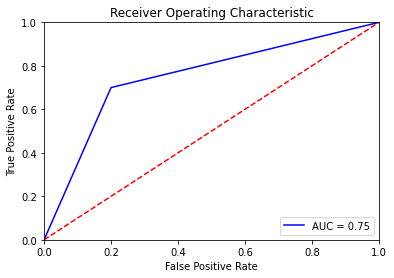

{'max_depth': 5, 'min_samples_leaf': 7}
Mejor ROC-AUC en validación cruzada: 0.613
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 7}
0.6222222222222222
[[13 12]
 [ 5 15]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.75 0.6222222222222222 0.52 0.6382978723404256


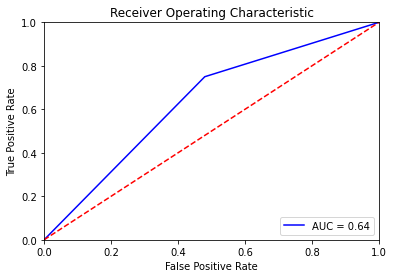

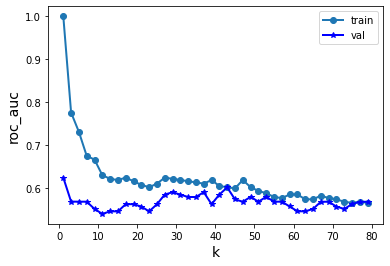

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.624
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}
0.5777777777777777
[[17  8]
 [11  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.45 0.5777777777777777 0.68 0.48648648648648646


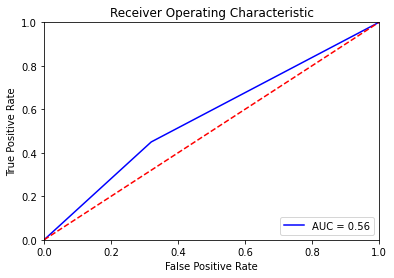

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.579
0.7555555555555555
[[23  2]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.7555555555555555 0.92 0.6666666666666667


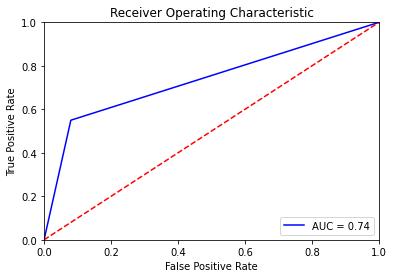

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.590
0.7111111111111111
[[17  8]
 [ 5 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.75 0.7111111111111111 0.68 0.6976744186046512


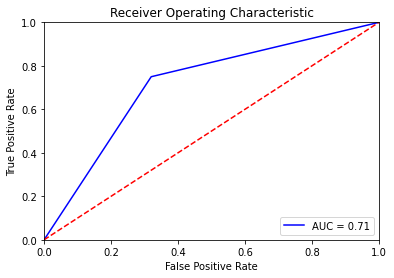

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

# ***Quinta partición***

In [ ]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

In [ ]:
X_train_4.isna().sum()

Value_HBA1C               0
Value_CPEP                5
Value_CREAS               5
Value_GLU                 5
NumMeterCheckDayMeter    84
LastFoodIntakeCarbs      37
Weight_mod                1
Height_mod                3
SymbDigWTotCorr           7
SymbDigWNumErr            7
SymbDigOTotCorr           8
TrailMakATotTime          0
TrailMakBTotTime          4
GrPegDomHand              0
GrPegDomNumDrops          2
GrPegNonNumDrops          3
DukeSocIntScore           1
ReadCardLowLine_20/25     0
ReadCardLowLine_20/80     0
MoCAVisEx                 0
MoCAAtt2                  0
MoCALang2                 0
MoCADelRec                0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [ ]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_4, Y_train_4, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_4)

# transform the dataset
X_train_4 = imputer.transform(X_train_4)

# print total missing
print('Missing: %d' % sum(isnan(X_train_4).flatten()))

X_test_4=imputer.transform(X_test_4)
print('Missing: %d' % sum(isnan(X_test_4).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical4=X_train_4[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_train_categorical4=X_train_4[:,[13,17,18,20,21]]
X_test_numerical4=X_test_4[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19,22]]
X_test_categorical4=X_test_4[:,[13,17,18,20,21]]




In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


A continuación, aplicacmos los modelos:

Valor correspondiente para el hiperparámetro: {'C': 20, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.607
0.6888888888888889
[[20  5]
 [ 9 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.55 0.6888888888888889 0.8 0.6111111111111112


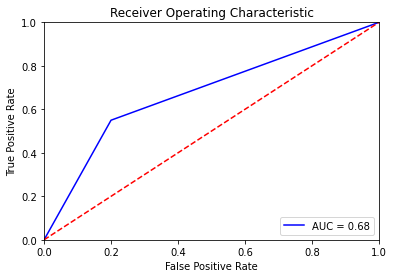

{'max_depth': 5, 'min_samples_leaf': 11}
Mejor ROC-AUC en validación cruzada: 0.630
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 11}
0.6444444444444445
[[21  4]
 [12  8]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.4 0.6444444444444445 0.84 0.5


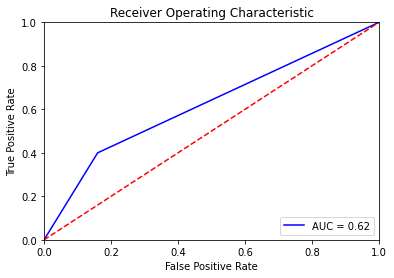

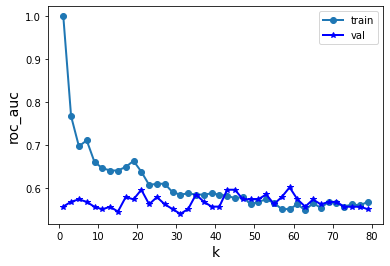

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.601
Valor correspondiente para el hiperparámetro: {'n_neighbors': 59}
0.6888888888888889
[[25  0]
 [14  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.3 0.6888888888888889 1.0 0.4615384615384615


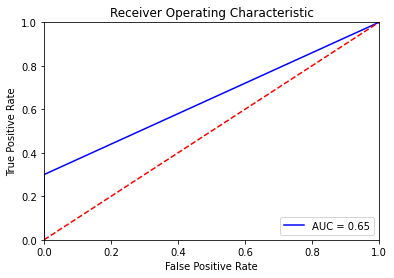

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.7333333333333333
[[23  2]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.7333333333333333 0.92 0.625


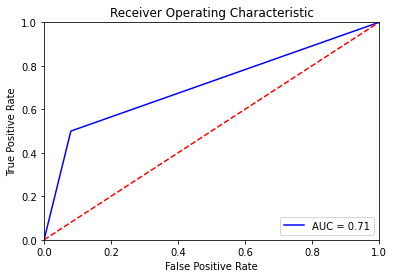

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.562
0.6444444444444445
[[19  6]
 [10 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5 0.6444444444444445 0.76 0.5555555555555556


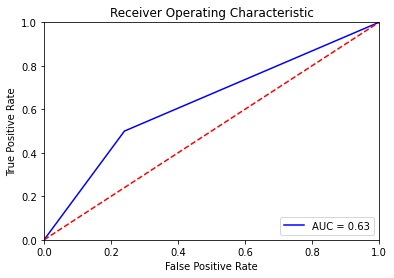

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# mlp=MLP(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

,model,mean,std
0,LASSO,0.694444,0.048113
1,DT,0.600000,0.035136
2,KNN,0.622222,0.041574
3,Radial SVM,0.677778,0.067586
4,Linear SVM,0.644444,0.047140


In [ ]:
model2_scaler=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

,model,mean,std
0,LASSO,0.68375,0.046284
1,DT,0.59250,0.035444
2,KNN,0.59750,0.031721
3,Radial SVM,0.66000,0.063147
4,Linear SVM,0.63625,0.049165


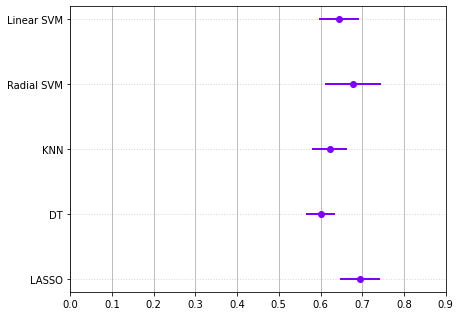

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("UnionBBDD_accuracy"))
# plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

,model,mean,std
0,LASSO,0.5875,0.073951
1,DT,0.5250,0.143614
2,KNN,0.3750,0.075000
3,Radial SVM,0.5000,0.093541
4,Linear SVM,0.5625,0.129301


In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


,model,mean,std
0,LASSO,0.78,0.087178
1,DT,0.66,0.128062
2,KNN,0.82,0.128062
3,Radial SVM,0.82,0.131149
4,Linear SVM,0.71,0.103441
